# Forbush Collection EDA

## As of 4/15/25

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
sns.set()
pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

## Read Data

Just start with a quick look at a random 5 rows to see what kinds of fields exist in the data

In [2]:
df_full = pd.read_excel("INVENTORY as 41525.xlsx")
df = df_full.copy()

In [3]:
df['Item ID'].nunique(), df.shape

(50531, (50531, 42))

In [5]:
df[df['Item ID']==22072673]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
310,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,158.1 PEER,NaN,NaN,Available,Book,37365003133448,4695792,https://bark.cwmars.org/opac/extras/ac/jacket/...,I am enough : mark your mirror and change your...,"Peer, Marisa","[London?] : Marisa Peer, [2018]",2018,"{1916411002,9781916411005}",NaN,NaN,2024-03-11T10:33:36-04:00,2024-03-28T16:19:22-04:00,2024-06-18T10:02:04.138048-04:00,2025-02-25T21:00:01.343856-05:00,2024-05-27,4,0,4,1,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 1108732590,158_100000000000000_PEER,False,22072673


In [14]:
#Quick random sample of 5 to take a look

df.sample(5)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
43028,Westminster Forbush Memorial Library,Juvenile,NaN,J CHOOSE 973.731 LASS,NaN,NaN,Available,Book,37365002549115,1016694,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Battle of Bull Run : an interactive histor...,"Lassieur, Allison.","Mankato, Minn. : Capstone Press, c2009.",2009,"{""9781429620116 (lib. bdg.)"",""1429620110 (lib....",NaN,32.23,2013-10-19T08:43:10-04:00,2013-10-25T16:20:20-04:00,2023-01-27T14:58:51.606665-05:00,2023-01-27T14:58:51.606665-05:00,2023-01-26,14,0,0,7,-,-,Book,Childrens,Books,Juv Nonfiction Hardcover,-,True,True,NaN,NaN,ocolc 212908682,J_CHOOSE_973_731000000000000_LASS,False,15075357
4725,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,813.52 NORD,NaN,NaN,Available,Book,37365002971020,455069,https://bark.cwmars.org/opac/extras/ac/jacket/...,Mutiny on the Bounty,"Nordhoff, Charles 1887-1947","Boston : Little, Brown, [1989], c1932.",1989,"{""0316611689 :""}",NaN,10.97,2021-12-02T08:37:45-05:00,2021-12-02T11:51:22.995353-05:00,2021-12-02T11:51:22.995353-05:00,2025-02-25T21:00:01.343856-05:00,NaT,0,0,0,10,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,NaN,813_520000000000000_NORD,False,20660794
46545,Westminster Forbush Memorial Library,Kendig Room,NaN,LT FOX,NaN,NaN,Available,Book,37365002991267,4433410,https://bark.cwmars.org/opac/extras/ac/jacket/...,Gone by midnight,"Fox, Candice","Thorndike, Maine : Center Point Large Print, 2...",2020,"{1643585886,9781643585888}",NaN,23.37,2020-08-11T08:41:28-04:00,2020-08-11T09:16:44-04:00,2025-02-25T17:43:38.15206-05:00,2025-03-27T21:00:02.010927-04:00,2025-02-07,5,1,1,30,-,-,Large Print Book,Adult,Books,Large Type,-,True,True,NaN,NaN,ocolc 1137839142,LT_FOX,False,19881349
20092,Westminster Forbush Memorial Library,General,NaN,FIC THA,NaN,NaN,Available,Book,37365004245639,2230177,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Hot Flash Club,"Thayer, Nancy 1943-","New York : Ballantine Books, 2004, c2003.",2003,{0345468627},NaN,30.00,2004-10-05T00:00:00-04:00,2012-08-29T15:16:26-04:00,2025-03-07T13:48:56.74913-05:00,2025-03-07T13:48:56.74913-05:00,2025-03-01,48,1,0,52,-,NOTE - Brodart Jan 2004 (Staff),Book,Adult,Books,Fiction,-,True,True,NaN,NaN,ocolc 53920945,FIC_THA,False,3017254
41577,Westminster Forbush Memorial Library,Juvenile,NaN,J 811.54 UPDI,NaN,NaN,Available,Book,37365002885287,2042164,https://bark.cwmars.org/opac/extras/ac/jacket/...,A child's calendar,"Updike, John.","New York : Holiday House, c1999.",1999,{0823414450},NaN,16.95,2012-05-18T00:00:00-04:00,2012-05-18T00:00:00-04:00,2024-02-15T18:28:55.274686-05:00,2024-02-15T18:28:55.274686-05:00,2024-01-24,12,0,2,50,-,-,Book,Childrens,Books,Juv Nonfiction Hardcover,-,True,True,NaN,NaN,ocolc 39981626,J_811_540000000000000_UPDI,False,4077982


In [15]:
df.columns

Index(['Owning Library', 'Shelving Location', 'CN Prefix', 'Call Number', 'CN Suffix', 'Part', 'Item Status', 'Circ Modifier', 'Barcode', 'TCN', 'Cover', 'Title', 'Author', 'Publisher', 'Published Year', 'ISBN', 'ISSN', 'Price', 'Create Date/Time', 'Active Date/Time', 'Item Status Change Date/Time', 'Last Edit Date/Time', 'Last Circ in EG', 'Total Circs', 'CY Circs', 'PY Circs', 'Other Copies', 'Item Alerts', 'Item Notes', 'Catalog Icon', 'ARIS Age', 'ARIS Format', 'CWMARS Format', 'Library StatCat', 'Circulate Field', 'Holdable Field', 'Latest Inventory Date/Time', 'Inventory Workstation', 'OCLC #', 'Call Number Sortkey', 'Deleted?', 'Item ID'], dtype='object')

In [16]:
# Some datetime columns, let's convert those before doing statistics

datetime_cols = ['Create Date/Time', 'Active Date/Time', 'Item Status Change Date/Time', 'Last Edit Date/Time',"Last Circ in EG"]
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col],format='mixed')

C:\Users\codyg\AppData\Local\Temp\ipykernel_6636\1417628981.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[col] = pd.to_datetime(df[col],format='mixed')
C:\Users\codyg\AppData\Local\Temp\ipykernel_6636\1417628981.py:5: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df[col] = pd.to_datetime(df[col],format='mixed')
C:\Users\codyg\AppData\Local\Temp\ipykernel_6636\1417628981.py:5: FutureWarning: In a future version of pandas, parsing dateti

In [17]:
pd.to_datetime(df['Create Date/Time'], utc=True)

0       2019-04-23 16:57:44+00:00
1       2022-07-15 17:30:56+00:00
2       2012-12-04 15:31:24+00:00
3       2014-09-19 16:47:22+00:00
4       2024-10-02 12:23:36+00:00
                   ...           
50526   2017-06-16 14:20:57+00:00
50527   2024-03-25 14:04:17+00:00
50528   2020-12-15 17:43:17+00:00
50529   2018-10-23 16:04:04+00:00
50530   2007-02-08 05:00:00+00:00
Name: Create Date/Time, Length: 50531, dtype: datetime64[ns, UTC]

In [18]:
#interesting mix of formats
df[ ['Create Date/Time', 'Active Date/Time', 'Item Status Change Date/Time', 'Last Edit Date/Time',"Last Circ in EG"]].head()

,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG
0,2019-04-23 12:57:44-04:00,2019-06-20 16:49:02-04:00,2022-03-10 13:41:23.873194-05:00,2025-02-25 21:00:01.343856-05:00,2021-06-25
1,2022-07-15 13:30:56-04:00,2022-10-21 13:26:57-04:00,2023-01-03 14:22:02.266361-05:00,2025-02-25 21:00:01.343856-05:00,2022-12-28
2,2012-12-04 10:31:24-05:00,2012-12-05 18:54:35-05:00,2024-10-25 09:59:58.207262-04:00,2025-02-25 21:00:01.343856-05:00,2023-09-27
3,2014-09-19 12:47:22-04:00,2014-09-23 11:52:30-04:00,2025-01-28 10:16:03.428232-05:00,2025-02-25 21:00:01.343856-05:00,2025-01-24
4,2024-10-02 08:23:36-04:00,2025-01-09 09:46:08.973816-05:00,2025-01-09 09:46:08.973816-05:00,2025-02-25 21:00:01.343856-05:00,NaT


In [19]:
df.describe()

,CN Prefix,TCN,Price,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item ID
count,0.0,5.053100e+04,50460.000000,45098,50531.000000,50531.000000,50531.000000,50531.000000,5.053100e+04
mean,NaN,3.561820e+06,18.615269,2023-11-05 13:35:14.914186496,13.482199,0.395896,1.380460,42.215571,1.616860e+07
min,NaN,1.510000e+02,0.000000,2012-04-13 00:00:00,0.000000,0.000000,0.000000,0.000000,7.630000e+02
25%,NaN,2.717626e+06,10.360000,2023-03-18 00:00:00,3.000000,0.000000,0.000000,6.000000,1.551965e+07
50%,NaN,4.178222e+06,15.390000,2024-05-09 00:00:00,8.000000,0.000000,0.000000,19.000000,1.921145e+07
75%,NaN,4.593786e+06,22.190000,2024-12-16 00:00:00,18.000000,0.000000,2.000000,44.000000,2.105967e+07
max,NaN,5.152107e+06,3000.000000,2025-04-14 00:00:00,211.000000,10.000000,25.000000,3609.000000,2.271840e+07
std,NaN,1.464539e+06,19.297904,NaN,16.748225,0.921059,2.184217,145.300481,7.186917e+06


Notes:

- CN Prefix not used. Can drop
- 50k records

In [20]:
df.describe(include=['O'])

,Owning Library,Shelving Location,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey
count,50531,50531,50531,234,2193,50531,50530,50531,50531,50529,44188,44625,50339,45390,380,50531,49849,50531,50531,50531,50531,50471,49910,49923,50530,50531,6623,6623,48846,50531
unique,1,10,34764,78,598,16,18,50531,47941,44578,20329,23859,239,44016,147,30258,43302,48974,40922,752,1378,29,3,7,61,1,6623,120,46740,34695
top,Westminster Forbush Memorial Library,Juvenile,PER,v.1,v.1,Available,Book,37365002994634,https://bark.cwmars.org/opac/extras/ac/jacket/...,Annual reports of the town officers of Westmin...,"Patterson, James 1947-","Thorndike, Maine : Center Point Large Print, 2...",2021,"{1974752739,9781974752737,1974749649,978197474...",{0010-7174},2012-05-18 00:00:00-04:00,2012-05-18 00:00:00-04:00,2012-05-18 11:54:45.551213-04:00,2025-02-25 21:00:01.343856-05:00,-,-,Book,Adult,Books,Fiction,-,2022-06-28T12:35:55.936214-04:00,STERLING-NSG04,ocolc 46841310,PER
freq,50531,21727,283,41,157,44546,42060,1,110,110,396,120,4041,42,35,1331,1158,813,5777,43023,48082,40737,26387,41961,6306,50531,1,571,110,283


Notes:

- Owning Library is 1 unique value: Westminster Forbush
- 10 unique shelving locations: correspond to physical locations in the library
- Most frequent author: James Patterson (No surprise there)
- Most frequent title: Westminster annual reports
- Most records were created on 2012-05-18: Maybe when this database was set up or populated?

# Data Quality Check

## Numeric Columns

In [21]:
numeric_columns = df.describe().columns

In [22]:
df[numeric_columns].count()

CN Prefix              0
TCN                50531
Price              50460
Last Circ in EG    45098
Total Circs        50531
CY Circs           50531
PY Circs           50531
Other Copies       50531
Item ID            50531
dtype: int64

### Check Missing Data
- Columns: CN Prefix, Last Circ in EG, Price
### CN Prefix

In [23]:
# Always empty -- can drop

df["CN Prefix"].unique()

array([nan])

### Last Circ in EG

In [24]:
# nothing obvious about these data
df[df['Last Circ in EG'].isna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
41414,Westminster Forbush Memorial Library,Juvenile,NaN,J 796.362 CHAN,NaN,NaN,Available,Book,37365002986739,4340905,https://bark.cwmars.org/opac/extras/ac/jacket/...,Boys' lacrosse : a guide for players and fans,"Chandler, Matt","North Mankato, Minnesota : Capstone Press, [2019]",2019,"{""9781543574265 (ebook pdf)"",1543574599,978154...",NaN,21.41,2020-03-17 09:36:38-04:00,2020-07-22 08:17:52-04:00,2024-10-09 09:57:40.334951-04:00,2024-10-09 09:57:40.334951-04:00,NaT,0,0,0,1,-,-,Book,Childrens,Books,Juv Nonfiction Hardcover,-,True,True,NaN,NaN,ocolc 1086495227,J_796_362000000000000_CHAN,False,19694805
23821,Westminster Forbush Memorial Library,General,NaN,PER,NaN,2024-09-01 00:00:00,Available,Periodical,37365003086240,2176565,https://bark.cwmars.org/opac/extras/ac/jacket/...,N.A.D.A. official used car guide. New England ...,NaN,"McLean, Va. : National Automobile Dealers Used...",1933,NaN,{0027-5794},5.00,2024-09-10 11:50:03-04:00,2024-09-10 12:01:55.175836-04:00,2024-09-10 12:01:55.175836-04:00,2024-09-10 12:01:55.175836-04:00,NaT,0,0,0,80,-,-,Serial publications and magazines,Adult,"Volumes of Print Periodicals, Newspapers and O...",Magazine,-,True,True,NaN,NaN,ocolc 12766123,PER,False,22360199
23273,Westminster Forbush Memorial Library,General,NaN,On Order1651284,NaN,NaN,On order,Book,On Order 1651283,5135321,https://bark.cwmars.org/opac/extras/ac/jacket/...,Our dear Miss H. is on the case,"Marsh, Violet","New York : Forever, 2025.",2025,"{9781538739655,""1538739631 : PAP"",""97815387396...",NaN,17.99,2025-01-31 09:16:30.809147-05:00,NaN,2025-01-31 09:16:30.809147-05:00,2025-01-31 09:16:30.809147-05:00,NaT,0,0,0,6,-,-,Book,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1651284,False,22583747


<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

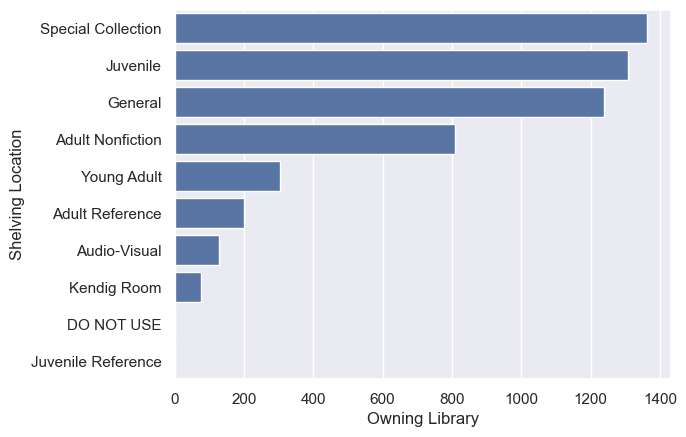

In [25]:
# Check if there's a correlation with location
## Maybe? Special Collections Don't circ, but nothing obvious to indicate a location or type
sns.barplot(data=df[df['Last Circ in EG'].isna()].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='CWMARS Format'>

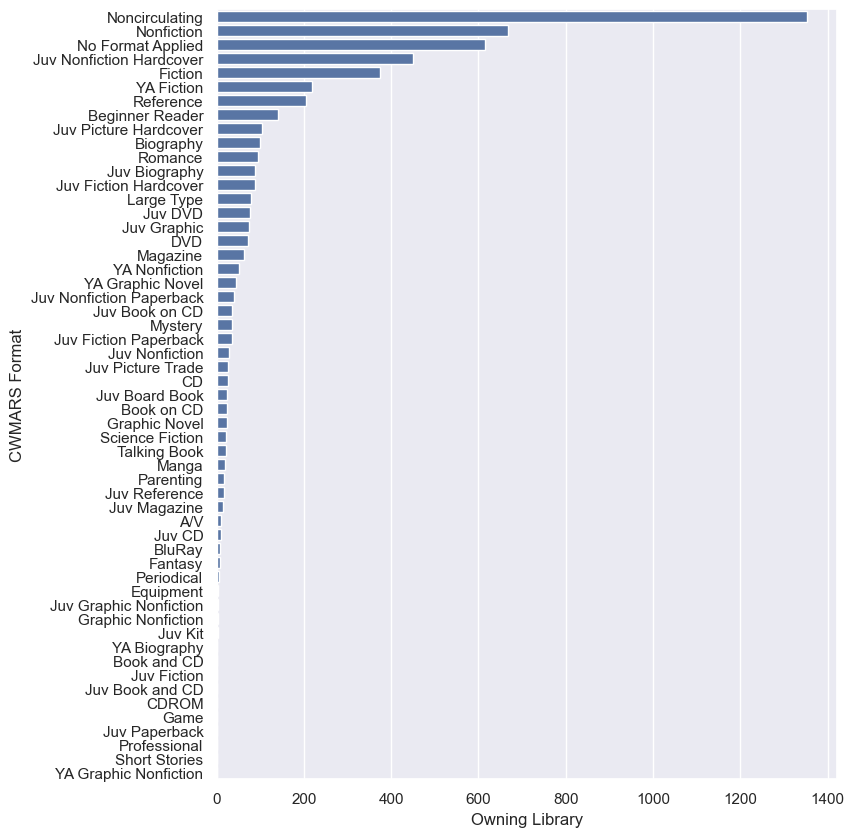

In [26]:
#Typically the missing "Last Circ in EG" field is in the Noncirculating. So maybe this is the last time it circulated
# The library also uses a catalog called "Evergreen", so this might be an indication of when it last circulated according to the Evergreen record
# Makes sense that it would be largely the non-circulating items. Some nonfiction also doesn't circulate. 
# Can dig in more, but for now this looks like good data, so no need to clean it 

fig, ax = plt.subplots(figsize = (8,10))
sns.barplot(data=df[df['Last Circ in EG'].isna()].groupby("CWMARS Format").count()['Owning Library'].sort_values(ascending=False), orient='h')

### Price

In [27]:
#Some of these seem to be "On Order" - so could indicate that the item doesn't have a price if it's on order
df[df['Price'].isna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
23566,Westminster Forbush Memorial Library,General,NaN,On Order1668949,NaN,NaN,On order,Book,On Order 1668949,5147353,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Last Comics on Earth: A Song of Swords and...,"Brallier, Max",Viking Books for Young Readers 20250429,2025,"{0593526813,9780593526811}",NaN,NaN,2025-03-21 15:58:00.172759-04:00,NaN,2025-03-21 15:58:00.172759-04:00,2025-03-21 15:58:00.172759-04:00,NaT,0,0,0,3,-,-,Book,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1668949,False,22678790
23564,Westminster Forbush Memorial Library,General,NaN,On Order1668939,NaN,NaN,On order,Book,On Order 1668939,5147111,https://bark.cwmars.org/opac/extras/ac/jacket/...,Eyewitness Encyclopedia of Animals,DK,DK Publishing (Dorling Kindersley) 20250415,2025,"{0593961676,9780593961674}",NaN,NaN,2025-03-21 15:57:58.787838-04:00,NaN,2025-03-21 15:57:58.787838-04:00,2025-03-21 15:57:58.787838-04:00,NaT,0,0,0,2,-,-,Book,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1668939,False,22678780
23588,Westminster Forbush Memorial Library,General,NaN,On Order1669015,NaN,NaN,On order,Book,On Order 1669015,5147110,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Beach Day: Three-And-A-Half Stories,"Dyckman, Ame",Beach Lane Books 20250429,2025,"{1665957425,9781665957427}",NaN,NaN,2025-03-21 15:58:09.855691-04:00,NaN,2025-03-21 15:58:09.855691-04:00,2025-03-21 15:58:09.855691-04:00,NaT,0,0,0,5,-,-,Book,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1669015,False,22678858


<Axes: xlabel='Owning Library', ylabel='Item Status'>

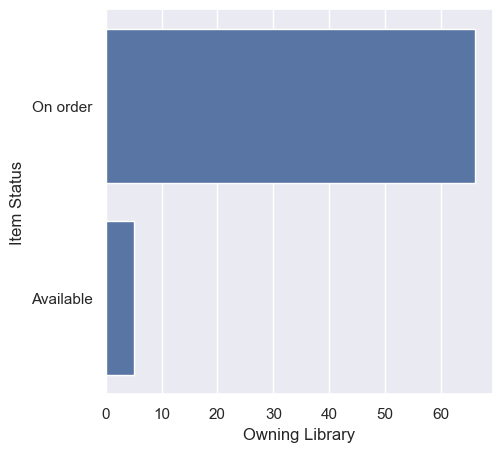

In [28]:
# Check by Item Status
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df['Price'].isna()].groupby("Item Status").count()['Owning Library'].sort_values(ascending=False), orient='h')

In [29]:
#Check na price but available
df[df['Price'].isna() & (df['Item Status']=="Available")]["Owning Library"].count()

np.int64(5)

In [30]:
# Only 5 items - let's see what they are
#No obvious pattern in these 5. I'll flag them and ask the librarians, there are only 5, so they won't affect any statistics but might be helpful to clean up their data
df[df['Price'].isna() & (df['Item Status']=="Available")]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
310,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,158.1 PEER,NaN,NaN,Available,Book,37365003133448,4695792,https://bark.cwmars.org/opac/extras/ac/jacket/...,I am enough : mark your mirror and change your...,"Peer, Marisa","[London?] : Marisa Peer, [2018]",2018,"{1916411002,9781916411005}",NaN,NaN,2024-03-11 10:33:36-04:00,2024-03-28 16:19:22-04:00,2024-06-18 10:02:04.138048-04:00,2025-02-25 21:00:01.343856-05:00,2024-05-27,4,0,4,1,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 1108732590,158_100000000000000_PEER,False,22072673
6779,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,BIO WARHOL,NaN,NaN,Available,Book,37365002919276,4390725,https://bark.cwmars.org/opac/extras/ac/jacket/...,Warhol,"Gopnik, Blake","New York, NY : ECCO, an imprint of HarperColli...",2020,"{9780062298393,0062298399}",NaN,NaN,2020-03-25 13:29:47-04:00,2020-05-05 09:19:36-04:00,2023-03-21 10:07:35.726085-04:00,2025-02-25 21:00:01.343856-05:00,2023-03-08,2,0,0,23,-,-,Book,Adult,Books,Biography,-,True,True,NaN,NaN,ocolc 1110450150,BIO_WARHOL,False,19702363
14521,Westminster Forbush Memorial Library,General,NaN,FIC CROOKS,NaN,NaN,Available,Book,37365003064320,5004528,https://bark.cwmars.org/opac/extras/ac/jacket/...,Under the influence : a novel,"Crooks, Noelle","New York : Gallery Books, 2023.",2023,"{166800495X,9781668004951,1668004941,978166800...",NaN,NaN,2023-07-21 08:38:28-04:00,2023-08-10 18:47:36-04:00,2024-01-02 13:51:53-05:00,2024-01-02 15:51:57.563659-05:00,2023-11-07,6,0,0,29,-,-,Book,Adult,Books,Fiction,-,True,True,NaN,NaN,ocolc 1347429014,FIC_CROOKS,False,21689378
40138,Westminster Forbush Memorial Library,Juvenile,NaN,J 599.367 ROTH,NaN,NaN,Available,Book,37365002705550,3752525,https://bark.cwmars.org/opac/extras/ac/jacket/...,Prairie dog song : the key to saving North Ame...,"Roth, Susan L.","New York : Lee & Low Books Inc., [2016]",2016,"{1620142457,9781620142455}",NaN,NaN,2016-09-17 07:52:30-04:00,2016-10-27 10:16:59-04:00,2023-08-01 13:37:34.205354-04:00,2023-08-01 13:37:34.205354-04:00,2023-07-17,2,0,0,16,-,-,Book,Childrens,Books,Juv Nonfiction Hardcover,-,True,True,NaN,NaN,ocolc 913957605,J_599_367000000000000_ROTH,False,17266176
40425,Westminster Forbush Memorial Library,Juvenile,NaN,J 623.74 MURR,NaN,NaN,Available,Book,37365002855181,3772582,https://bark.cwmars.org/opac/extras/ac/jacket/...,What's inside? modern military aircraft,"Murray, Aaron R.","New York, N.Y. : Rosen Publishing Group, Inc.,...",2016,"{1508146136,9781508146131}",NaN,NaN,2019-02-27 11:04:07-05:00,2019-03-21 12:37:16-04:00,2024-07-03 15:52:04.288962-04:00,2024-07-03 15:52:04.288962-04:00,2024-06-25,12,0,2,5,-,-,Book,Childrens,Books,Juv Nonfiction Hardcover,-,True,True,NaN,NaN,ocolc 945219486,J_623_740000000000000_MURR,False,18958533


In [157]:
df[df['Price'].isna() & (df['Item Status']=="Available")]['Barcode'].values

array([37365003133448, 37365002919276, 37365003064320, 37365002705550,
       37365002855181], dtype=object)

<Axes: xlabel='Price', ylabel='Count'>

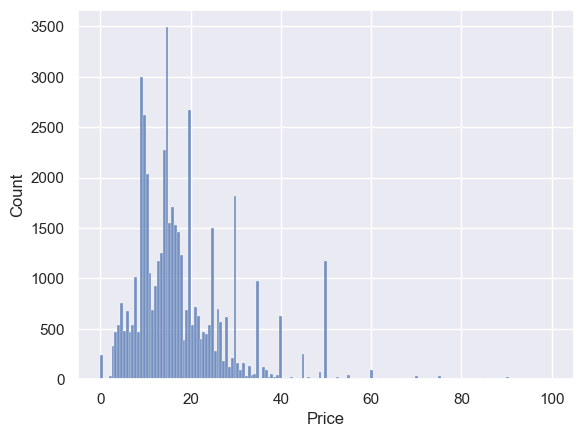

In [31]:
sns.histplot(df[df['Price']<100]["Price"])

In [32]:
#Price of these seems a bit wonky, but not sure it will be important
df[df['Price']>500]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
15422,Westminster Forbush Memorial Library,General,NaN,FIC GAR,NaN,NaN,Available,Book,37365000074256,619615,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Survivors Club,"Gardner, Lisa.","New York : Bantam Books, 2002.",2002,{0553802518},NaN,3000.0,2002-07-03 00:00:00-04:00,2012-08-31 17:45:47-04:00,2023-07-13 14:47:57.723095-04:00,2023-07-13 14:47:57.723095-04:00,2023-06-30,41,0,0,36,-,NOTE - Donated - March 2004 (Staff),Book,Adult,Books,Fiction,-,True,True,NaN,NaN,ocolc 49320432,FIC_GAR,False,4052009
32444,Westminster Forbush Memorial Library,Juvenile,NaN,JJB LOVEVE,NaN,NaN,Available,Book,37365003097296,5142011,https://bark.cwmars.org/opac/extras/ac/jacket/...,Parts of me,Lovevery (Firm),[Place of publication not identified] : Loveve...,2022,"{0999753738,9780999753736}",NaN,699.0,2025-03-04 15:47:31-05:00,2025-03-05 09:41:07-05:00,2025-04-05 13:37:19.557406-04:00,2025-04-05 13:37:19.557406-04:00,2025-03-21,1,1,0,0,-,-,Book,Childrens,Books,Juv Board Book,-,True,True,NaN,NaN,ocolc 1463932175,JJB_LOVEVE,False,22648093


## Numeric Data quality notes

Data are pretty clean. Seems like the three columns with missing numeric data (Price, Last Circ in EG, and CN Prefix) are pretty straightforward.

Need to check if Last Circ in EG is the last time the library circulated that item, or if it's something different.

Price generally makes sense, except for a couple of high priced items. Probably just the "on order" shouldn't have a price until they arrive? There are a handful of exceptions, so going to flag that and see if there is a reason.

## Categorical Data Quality Check

In [33]:
cat_cols = df.describe(include=['O']).columns

In [34]:
df.describe(include=['O'])

,Owning Library,Shelving Location,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey
count,50531,50531,50531,234,2193,50531,50530,50531,50531,50529,44188,44625,50339,45390,380,50531,49849,50531,50531,50531,50531,50471,49910,49923,50530,50531,6623,6623,48846,50531
unique,1,10,34764,78,598,16,18,50531,47941,44578,20329,23859,239,44016,147,30258,43302,48974,40922,752,1378,29,3,7,61,1,6623,120,46740,34695
top,Westminster Forbush Memorial Library,Juvenile,PER,v.1,v.1,Available,Book,37365002994634,https://bark.cwmars.org/opac/extras/ac/jacket/...,Annual reports of the town officers of Westmin...,"Patterson, James 1947-","Thorndike, Maine : Center Point Large Print, 2...",2021,"{1974752739,9781974752737,1974749649,978197474...",{0010-7174},2012-05-18 00:00:00-04:00,2012-05-18 00:00:00-04:00,2012-05-18 11:54:45.551213-04:00,2025-02-25 21:00:01.343856-05:00,-,-,Book,Adult,Books,Fiction,-,2022-06-28T12:35:55.936214-04:00,STERLING-NSG04,ocolc 46841310,PER
freq,50531,21727,283,41,157,44546,42060,1,110,110,396,120,4041,42,35,1331,1158,813,5777,43023,48082,40737,26387,41961,6306,50531,1,571,110,283


In [35]:
df[cat_cols].count()

Owning Library                  50531
Shelving Location               50531
Call Number                     50531
CN Suffix                         234
Part                             2193
Item Status                     50531
Circ Modifier                   50530
Barcode                         50531
Cover                           50531
Title                           50529
Author                          44188
Publisher                       44625
Published Year                  50339
ISBN                            45390
ISSN                              380
Create Date/Time                50531
Active Date/Time                49849
Item Status Change Date/Time    50531
Last Edit Date/Time             50531
Item Alerts                     50531
Item Notes                      50531
Catalog Icon                    50471
ARIS Age                        49910
ARIS Format                     49923
CWMARS Format                   50530
Library StatCat                 50531
Latest Inven

- Barcode and published year seem like they should be numeric. Need to check why they are not
- CN Suffix used but rarely
- ISSN used but rarely
- Part, Latest Inventory Date/time, Inventory Workstation used ~10% of the time
- Some missing data in handful of other columns

### CN Suffix

Notes:

CN Suffix looks to be the version number or sometimes discs for DVDs. Mostly "Library Use Only" items or "Noncirculating"

In [36]:
df[df["CN Suffix"].notna()]['Owning Library'].count()

np.int64(234)

In [37]:
df[df["CN Suffix"].notna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
48338,Westminster Forbush Memorial Library,Special Collection,NaN,SP HURD 929.3 NEWBURYPORT,v.2,v.2,Library Use Only,Noncirculating,37365002443152,195092,https://bark.cwmars.org/opac/extras/ac/jacket/...,"Vital records of Newburyport, Massachusetts, t...",Newburyport (Mass.),"Salem, Mass., The Essex institute, 1911.",1911,NaN,NaN,50.0,2011-07-28 00:00:00-04:00,2011-07-28 00:00:00-04:00,2012-05-18 11:54:45.551213-04:00,2012-05-18 11:54:45.551213-04:00,NaT,0,0,0,51,-,-,Book,Adult,Books,Noncirculating,-,True,True,NaN,NaN,ocolc 2705947,SP_HURD_929_300000000000000_NEWBURYPORT,False,3828497
48357,Westminster Forbush Memorial Library,Special Collection,NaN,SP HURD 929.3 ROCHESTER,V.2,V.2,Library Use Only,Noncirculating,37365002444044,191815,https://bark.cwmars.org/opac/extras/ac/jacket/...,"Vital records of Rochester, Massachusetts to t...",Rochester (Mass. : Town),"Boston, Mass, Pub. by the New England historic...",1914,NaN,NaN,50.0,2011-07-29 00:00:00-04:00,2011-07-29 00:00:00-04:00,2012-05-18 11:54:45.551213-04:00,2012-05-18 11:54:45.551213-04:00,NaT,0,0,0,42,-,-,Book,Adult,Books,Noncirculating,-,True,True,NaN,NaN,ocolc 1631612,SP_HURD_929_300000000000000_ROCHESTER,False,3375374
9684,Westminster Forbush Memorial Library,Audio-Visual,NaN,DVD 323.4 EYES,v.2,DISC 2,Available,DVD,37365002340226,2402062,https://bark.cwmars.org/opac/extras/ac/jacket/...,Eyes on the prize America's civil rights movement,NaN,"[Atlanta, GA] : PBS Home Video, 2006",2006,"{""9780793692613 (v.7)"",""079369261X (v.7)"",""978...",NaN,60.0,2009-06-30 00:00:00-04:00,2009-06-30 00:00:00-04:00,2017-04-11 10:34:01.108726-04:00,2017-04-11 10:34:01.108726-04:00,2017-04-05,13,0,0,46,Check In Alert / Check Out Alert - CHECK FOR 1...,-,DVD,Adult,Video cassettes/discs/DVD,DVD,-,True,True,NaN,NaN,ocolc 75532026,DVD_323_400000000000000_EYES,False,3133945


<Axes: xlabel='Owning Library', ylabel='Item Status'>

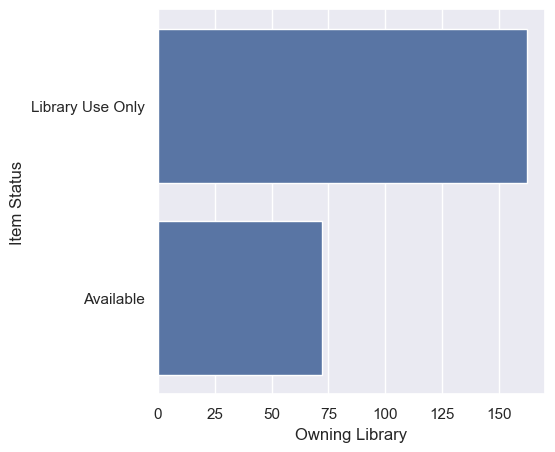

In [38]:
#Looks like they might be Library Use only if they exist?

# Check by Item Status
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["CN Suffix"].notna()].groupby("Item Status").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='Circ Modifier'>

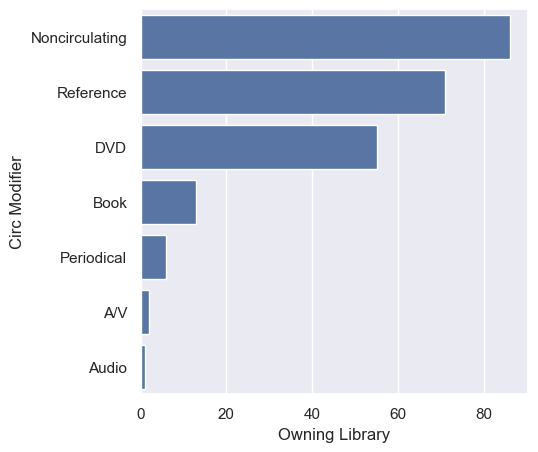

In [39]:
#Sorta. But there are about 1/3 that are available. Let's check circ modifier

# Check by Circ Modifier
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["CN Suffix"].notna()].groupby("Circ Modifier").count()['Owning Library'].sort_values(ascending=False), orient='h')

Typically CN Suffix is used for Noncirculating, reference, or media. Pretty rare to see it on a book. Interesting!

### Part

In [40]:
df[df["Part"].notna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
23714,Westminster Forbush Memorial Library,General,NaN,PER,NaN,JUL 15 2024,Available,Periodical,37365003086919,657007,https://bark.cwmars.org/opac/extras/ac/jacket/...,wy Time.,NaN,"[New York, etc., Time Inc.]",1923,NaN,NaN,5.0,2024-07-09 12:17:13-04:00,2024-07-09 12:18:29-04:00,2024-08-03 10:18:53.439101-04:00,2024-08-03 10:18:53.439101-04:00,2024-07-22,2,0,2,16,-,-,Serial publications and magazines,Adult,"Volumes of Print Periodicals, Newspapers and O...",Magazine,-,True,True,NaN,NaN,NaN,PER,False,22260455
1329,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,353.035 UNIT,NaN,1962,Available,Book,37365002575680,3205452,https://bark.cwmars.org/opac/extras/ac/jacket/...,Public papers of the Presidents of the United ...,United States President (1961-1963 : Kennedy),"Washington : U.S. Govt. Print. Off, 1962-64.",1962,NaN,NaN,30.0,2014-03-20 09:30:50-04:00,2014-03-20 10:11:05.153726-04:00,2014-03-20 10:11:05.153726-04:00,2025-02-25 21:00:01.343856-05:00,NaT,0,0,0,2,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 877844,353_035000000000000_UNIT,False,15373365
48063,Westminster Forbush Memorial Library,Special Collection,NaN,SP ATTIC 974.439 WEST,NaN,1976,Library Use Only,Noncirculating,37365002440612,263577,https://bark.cwmars.org/opac/extras/ac/jacket/...,Annual town report Annual town report : Westmi...,Westminster (Mass.),"Westminster, Massachusetts : The Town, 1967-",1967-,NaN,NaN,20.0,2018-07-25 07:57:17.556622-04:00,2018-07-25 07:57:17.556622-04:00,2018-07-25 07:57:17.556622-04:00,2018-07-25 07:57:17.556622-04:00,NaT,0,0,0,73,-,-,Serial publications and magazines,Adult,Books,Noncirculating,-,False,False,NaN,NaN,NaN,SP_ATTIC_974_439000000000000_WEST,False,18563115


<Axes: xlabel='Owning Library', ylabel='Item Status'>

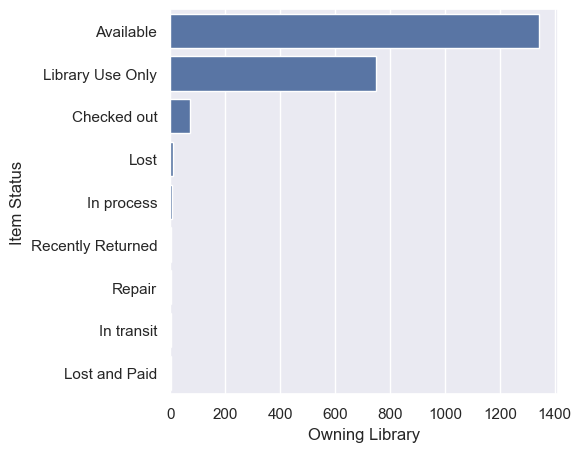

In [41]:
# Check by Item Status
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Part"].notna()].groupby("Item Status").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='Circ Modifier'>

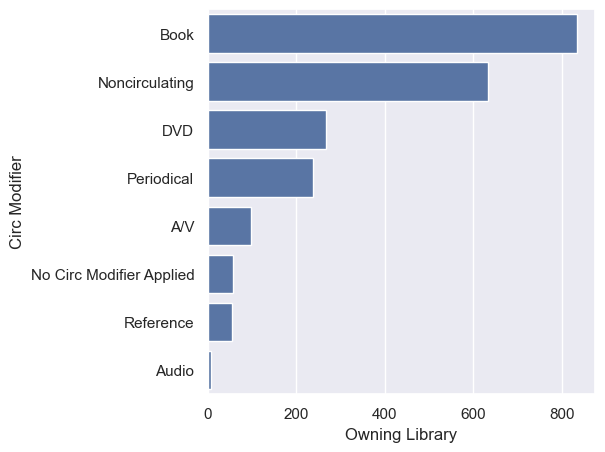

In [42]:
# Check by Circ Modifier
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Part"].notna()].groupby("Circ Modifier").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

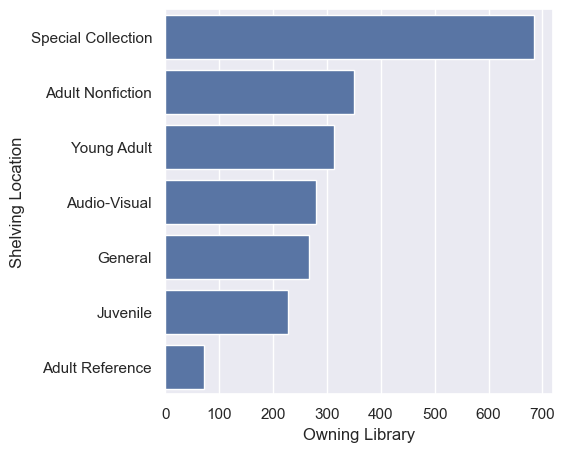

In [43]:

# Check by Location
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Part"].notna()].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

Notes:
If it has a "Part" is more likely something in the "special collection", but otherwise doesn't seem too notable. Some of the "Part" field seem to be years - 1971, 1952 etc.

### Circ Modifier

In [44]:
# Only one missing this field. Might be an error?
df[df['Circ Modifier'].isna()]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
12954,Westminster Forbush Memorial Library,DO NOT USE,NaN,Gila,NaN,NaN,Checked out,NaN,230527833,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2025-04-15 14:05:34-04:00,2025-04-15 14:06:04.572718-04:00,2025-04-15 14:06:04.572718-04:00,2025-04-15 14:06:04.572718-04:00,NaT,1,1,0,54,-,-,Book,Adult,Video cassettes/discs/DVD,NaN,-,True,True,NaN,NaN,NaN,GILA,False,22718301


### Title

missing title seems odd. Let's check

In [45]:
# No obvious reason that these shouldn't have a title. Might also be an error?
df[df["Title"].isna()]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
42192,Westminster Forbush Memorial Library,Juvenile,NaN,J 973.04 KAM,NaN,NaN,Available,Book,37365004346577,532524,https://bark.cwmars.org/opac/extras/ac/jacket/...,NaN,"Kamma, Anne.","New York : Scholastic, c1999.",1999,{0590397265},NaN,25.0,2004-10-18 00:00:00-04:00,2004-10-18 00:00:00-04:00,2012-05-18 11:54:45.551213-04:00,2012-05-18 11:54:45.551213-04:00,NaT,1,0,0,13,-,-,Book,Childrens,Books,Juv Nonfiction,-,True,True,NaN,NaN,ocolc 42709810,J_973_040000000000000_KAM,False,4078067
42209,Westminster Forbush Memorial Library,Juvenile,NaN,J973.2 MCGO,NaN,NaN,Available,Book,37365004345884,340964,https://bark.cwmars.org/opac/extras/ac/jacket/...,NaN,"McGovern, Ann.","New York : Scholastic, c1992.",1992,"{059045160X,""0833587765 (lib. bd.)""}",NaN,25.0,2004-10-05 00:00:00-04:00,2004-10-05 00:00:00-04:00,2023-11-14 14:06:24.422517-05:00,2023-11-14 14:06:24.422517-05:00,2023-11-12,24,0,0,32,-,-,Book,Childrens,Books,Juv Nonfiction,-,True,True,NaN,NaN,ocolc 26387893,J_973_200000000000000_MCGO,False,798488


### Author

In [46]:
df[df["Author"].isna()].shape

(6343, 42)

In [47]:
# Not sure why these don't have an author. Maybe it's multiple authors?
df[df["Author"].isna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
12068,Westminster Forbush Memorial Library,Audio-Visual,NaN,DVD TV SERIES/ GOLDEN S.3,NaN,NaN,Repair,DVD,37365002696346,3782732,https://bark.cwmars.org/opac/extras/ac/jacket/...,The golden girls. The complete third season,NaN,"Burbank, CA : ABC Studios, [2016]",2016,NaN,NaN,13.95,2016-07-16 07:48:53-04:00,2016-07-16 11:02:30-04:00,2021-03-26 11:03:41.027209-04:00,2021-03-26 11:03:41.027209-04:00,2021-02-24,53,0,0,2,Check In Alert / Check Out Alert - check for 3...,-,DVD,Adult,Video cassettes/discs/DVD,DVD,-,True,True,2020-08-17T10:55:53.31608-04:00,MARLBORO-MPL-D116,ocolc 945697222,DVD_TV_SERIES_GOLDEN_S_3_000000000000000,False,17146208
45105,Westminster Forbush Memorial Library,Juvenile,NaN,J MOVIE SCOOBY DOUBLE,NaN,NaN,Available,Book,37365003104795,3981820,https://bark.cwmars.org/opac/extras/ac/jacket/...,Scooby-Doo! double feature,NaN,"Burbank, CA : Warner Home Video, [2016?]",2016,NaN,NaN,4.06,2022-10-27 13:25:58-04:00,2022-12-01 10:33:42-05:00,2024-12-13 12:07:34-05:00,2025-03-03 09:09:59.375026-05:00,2024-12-04,4,0,2,4,Check In and Check Out Alert - CHECK FOR 2 DISCS,-,DVD,Childrens,Video cassettes/discs/DVD,Juv DVD,-,True,True,2024-12-12T10:14:58.25247-05:00,BARRE-Childrens,ocolc 966448042,J_MOVIE_SCOOBY_DOUBLE,False,21237311
11250,Westminster Forbush Memorial Library,Audio-Visual,NaN,DVD RED,NaN,NaN,Available,DVD,37365002495111,2798445,https://bark.cwmars.org/opac/extras/ac/jacket/...,Red Tails,NaN,"Beverly Hills, Calif. : 20th Century Fox Home ...",2012,"{9784543791984,4543791983,0024543791980}",NaN,29.00,2012-07-27 10:32:24-04:00,2012-09-04 17:05:59-04:00,2024-07-31 16:17:16.919385-04:00,2024-07-31 16:17:16.919385-04:00,2024-07-26,30,0,3,37,Check In Alert / Check Out Alert - check for 1...,-,DVD,Adult,Video cassettes/discs/DVD,DVD,-,True,True,NaN,NaN,ocolc 785956134,DVD_RED,False,14054492


<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

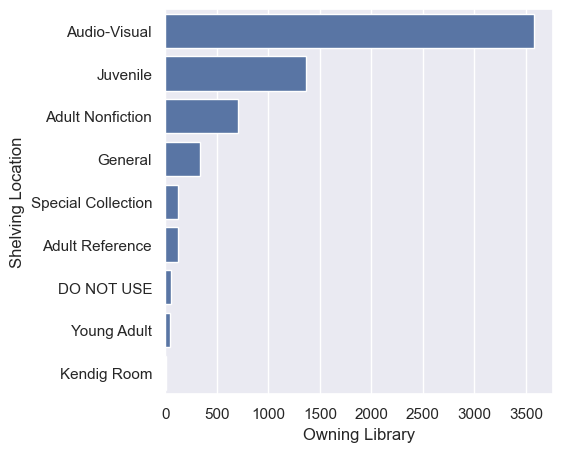

In [48]:
# Check by Location
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Author"].isna()].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='Circ Modifier'>

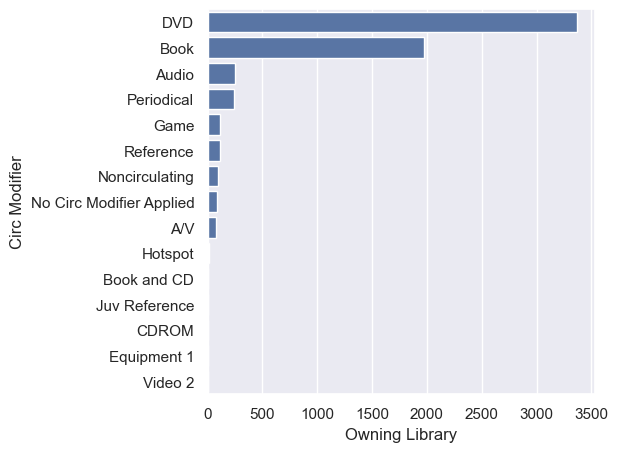

In [49]:
# Check by Circ Modifier
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Author"].isna()].groupby("Circ Modifier").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='CWMARS Format'>

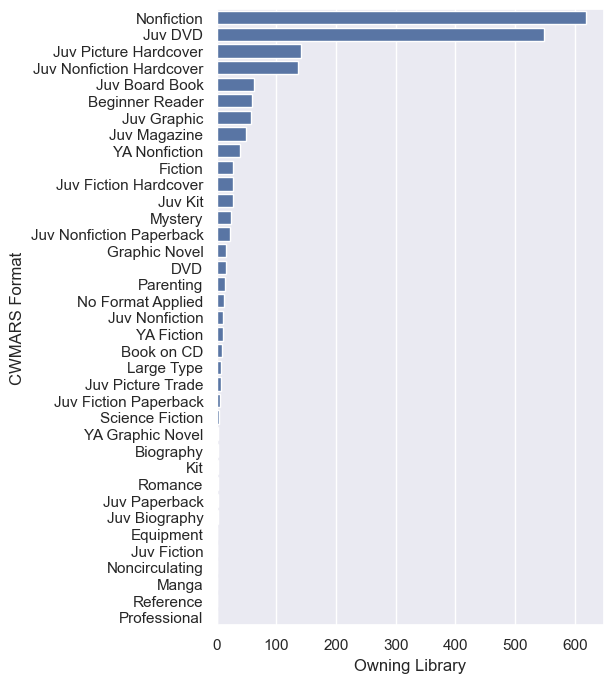

In [50]:

# Check Circ Modifier = Books by CWMARS Format
fig, ax = plt.subplots(figsize = (5,8))
sns.barplot(data=df[df["Author"].isna() & (df['Circ Modifier']=="Book")].groupby("CWMARS Format").count()['Owning Library'].sort_values(ascending=False), orient='h')


Typically an author does not exist when it's a DVD or other media. Interestingly, the "Circ Modifier" doesn't always indicate what it is. Sometimes Circ Modifier says "Book" but CWMARS format is a DVD/CD etc. Some non-fiction in there, not sure why they are authorless.

In [51]:
df[df["Author"].isna() & (df['CWMARS Format']=="Nonfiction")].sample(4)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
4572,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,808 CONC,NaN,NaN,Available,Book,37365002369340,1051564,https://bark.cwmars.org/opac/extras/ac/jacket/...,Concise rules of APA style.,NaN,"Washington, DC : American Psychological Associ...",2010,"{143380560X,9781433805608}",NaN,28.90,2010-01-19 00:00:00-05:00,2010-01-19 00:00:00-05:00,2025-02-04 13:31:44.105835-05:00,2025-02-25 21:00:01.343856-05:00,2025-01-02,16,1,0,5,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 317697841,808_000000000000000_CONC,False,1750721
2773,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,630.1 BACK,NaN,NaN,Checked out,Book,37365002916132,1024075,https://bark.cwmars.org/opac/extras/ac/jacket/...,The backyard homestead,NaN,"North Adams, MA : Storey Pub., 2009.",2009,"{""1603421386 (pbk. : alk. paper)"",""97816034213...",NaN,11.56,2020-07-02 07:35:33-04:00,2020-07-07 08:49:01-04:00,2025-04-10 00:54:36.028068-04:00,2025-04-10 00:54:36.028068-04:00,2025-04-10,9,2,0,56,-,-,Book,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 244420800,630_100000000000000_BACK,False,19826787
1862,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,378.16 PRIN,NaN,2023,Available,Book,37365003099870,4467125,https://bark.cwmars.org/opac/extras/ac/jacket/...,AP chemistry prep,NaN,"New York, NY : Penguin Random House, 2021-",2021,NaN,{2690-5302},12.19,2022-10-24 13:54:19-04:00,2022-10-25 17:56:44.281661-04:00,2022-10-25 17:56:44.281661-04:00,2025-02-25 21:00:01.343856-05:00,NaT,0,0,0,16,-,-,Serial publications and magazines,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 1141013841,378_160000000000000_PRIN,False,21229717
5282,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,917.56 MOON,NaN,2020,Available,Book,37365003000373,4052250,https://bark.cwmars.org/opac/extras/ac/jacket/...,Moon Great Smoky Mountains National Park.,NaN,"Berkeley, CA : Avalon Travel",2017,NaN,{2475-0824},17.01,2020-10-10 09:10:31-04:00,2020-10-14 08:33:51-04:00,2022-04-12 14:43:01.987603-04:00,2025-02-25 21:00:01.343856-05:00,2022-04-01,2,0,0,5,-,-,Serial publications and magazines,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 964072381,917_560000000000000_MOON,False,19976273


<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

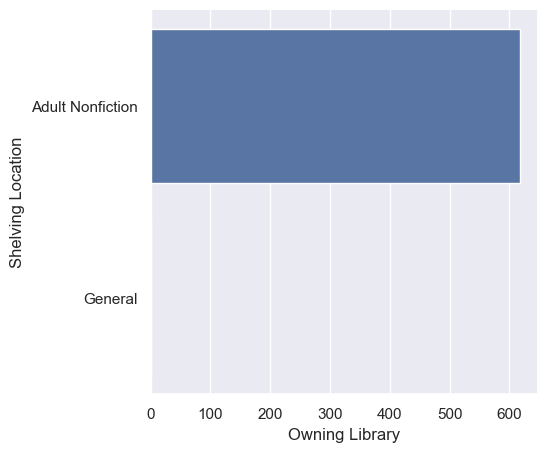

In [52]:
# Check CWMARS Format = Nonfiction, look at location
# Unsurprizingly the nonfiction is in the nonfiction section of the library
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["Author"].isna() & (df['CWMARS Format']=="Nonfiction")].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

### ISSN

From NYU: ISSN stands for International Standard Serial Number. ISSN's have eight digits, and each is unique to a journal publication

In [53]:
df[df["ISSN"].notna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
23839,Westminster Forbush Memorial Library,General,NaN,PER,NaN,SUMMER 2024,Available,Periodical,37365003086950,1059915,https://bark.cwmars.org/opac/extras/ac/jacket/...,Crochet world.,NaN,"Seabrook, N.H., House of White Birches.",1978,NaN,{0164-7962},5.00,2024-08-08 13:13:08-04:00,2024-08-08 13:15:57.801696-04:00,2024-08-08 13:15:57.801696-04:00,2024-08-08 13:15:57.801696-04:00,NaT,0,0,0,149,-,-,Serial publications and magazines,Adult,"Volumes of Print Periodicals, Newspapers and O...",Magazine,-,True,True,NaN,NaN,ocolc 4355050,PER,False,22311646
5298,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,917.91 ARIZ,NaN,2013,Available,Book,37365002533846,2458915,https://bark.cwmars.org/opac/extras/ac/jacket/...,Arizona & the Grand Canyon.,NaN,"New York : Fodor's Travel Publications, Â©2006-",2006,"{(OCoLC)1043468803,(OCoLC)1032315867,(OCoLC)10...",{1559-6230},20.99,2013-05-28 11:58:54-04:00,2013-05-31 10:28:29-04:00,2024-10-08 10:22:10.057729-04:00,2025-02-25 21:00:01.343856-05:00,2024-09-25,10,0,1,53,Check In Alert / Check Out Alert - check for m...,-,Serial publications and magazines,Adult,Books,Nonfiction,-,True,True,NaN,NaN,ocolc 62206462,917_910000000000000_ARIZ,False,14754655
23832,Westminster Forbush Memorial Library,General,NaN,PER,NaN,SEP-OCT 2024,Available,Periodical,37365003087214,1916248,https://bark.cwmars.org/opac/extras/ac/jacket/...,Good housekeeping,NaN,"[New York : International Magazine Co., 1916-",1916,NaN,{0017-209x},5.00,2024-08-27 12:18:59-04:00,2024-08-27 12:22:09-04:00,2024-11-20 16:08:04.437627-05:00,2024-11-20 16:08:04.437627-05:00,2024-11-06,7,0,7,1058,-,-,Serial publications and magazines,Adult,"Volumes of Print Periodicals, Newspapers and O...",Magazine,-,True,True,NaN,NaN,ocolc 2497043,PER,False,22338438


<Axes: xlabel='Owning Library', ylabel='Circ Modifier'>

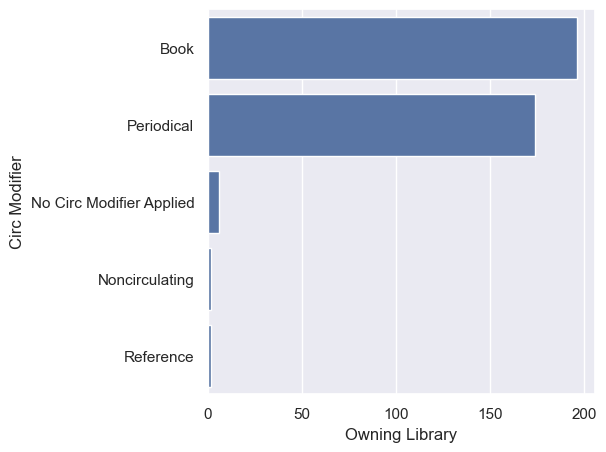

In [54]:
# Check by Circ Modifier
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["ISSN"].notna()].groupby("Circ Modifier").count()['Owning Library'].sort_values(ascending=False), orient='h')

<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

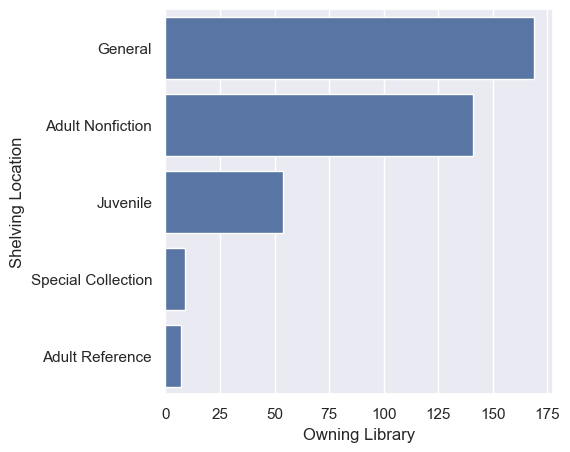

In [55]:
# Check by Location
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df["ISSN"].notna()].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

Text(0.5, 0, 'Count')

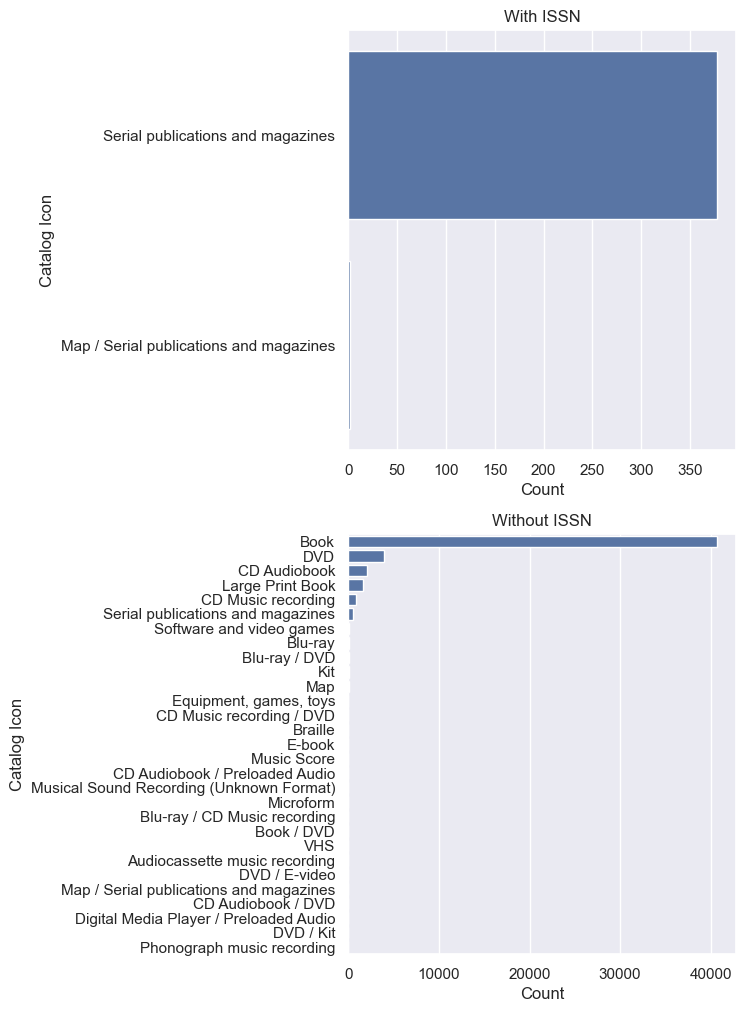

In [56]:
# Check by Catalog Icon
fig, (ax1, ax2) = plt.subplots(nrows=2, figsize = (5,12))
g1 = sns.barplot(data=df[df["ISSN"].notna()].groupby("Catalog Icon").count()['Owning Library'].sort_values(ascending=False), orient='h', ax=ax1)
g2 = sns.barplot(data=df[df["ISSN"].isna()].groupby("Catalog Icon").count()['Owning Library'].sort_values(ascending=False), orient='h', ax=ax2)
g1.set_title("With ISSN")
g1.set_xlabel("Count")
g2.set_title("Without ISSN")
g2.set_xlabel("Count")

Items with an ISSN are periodicals. Could dig in and see if there are any periodicals without an ISSN, but it's a good indicator.

### Inventory Workstation

In [57]:
#inventory workstation looks like an indicator of other libraries? Not sure what it tells me though. 
df[df['Inventory Workstation'].notna()].sample(3)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
19633,Westminster Forbush Memorial Library,General,NaN,FIC SILVER,NaN,NaN,Available,Book,37365002902942,4399817,https://bark.cwmars.org/opac/extras/ac/jacket/...,The two lives of Lydia Bird : a novel,"Silver, Josie","New York : Ballantine Books, [2020]",2020,"{0593135237,9780593135235}",NaN,13.52,2020-02-25 08:51:01-05:00,2020-03-05 19:35:15-05:00,2025-01-14 14:25:51.014084-05:00,2025-01-14 14:25:51.014084-05:00,2025-01-02,11,1,1,60,-,-,Book,Adult,Books,Fiction,-,True,True,2025-01-11T12:50:04.486502-05:00,STERLING-NSG04,ocolc 1141734126,FIC_SILVER,False,19654818
527,Westminster Forbush Memorial Library,Adult Nonfiction,NaN,277.3 SHAR,NaN,NaN,Available,Book,37365003118118,4969744,https://bark.cwmars.org/opac/extras/ac/jacket/...,"The other evangelicals : a story of liberal, B...","Sharp, Isaac B.","Grand Rapids, Michigan : Wm. B. Eerdmans Publi...",2023,"{9780802881755,0802881750}",NaN,18.72,2023-03-15 11:23:41-04:00,2023-04-13 17:31:08-04:00,2023-05-31 12:01:21-04:00,2025-02-25 21:00:01.343856-05:00,2023-05-31,2,0,0,2,-,-,Book,Adult,Books,Nonfiction,-,True,True,2023-05-04T09:25:44.999644-04:00,NORTHAMPTN-NNO12,ocolc 1338196216,277_300000000000000_SHAR,False,21460798
22934,Westminster Forbush Memorial Library,General,NaN,M WALKER/ BRUNO #14,NaN,NaN,Available,Book,37365002950438,4508568,https://bark.cwmars.org/opac/extras/ac/jacket/...,The coldest case,"Walker, Martin 1947 January 23-","New York : Alfred A. Knopf, 2021.",2021,"{0525567070,9780525567073,0525656677,978052565...",NaN,14.04,2021-07-26 21:34:01-04:00,2021-08-04 12:43:25-04:00,2024-07-30 12:00:18.143781-04:00,2024-07-30 12:00:18.143781-04:00,2024-07-28,7,0,2,62,-,-,Book,Adult,Books,Mystery,-,True,True,2022-10-31T13:54:55.580428-04:00,BOXBORO-bxcirc02,ocolc 1154101385,M_WALKER_BRUNO_14,False,20424763


## Things that look like they should be numeric

- barcode
- Published Year

### Published Year

In [58]:
df['Published Year'].sample(5)

9077     2020
39182    2018
38494    2018
33457    1987
20083    2018
Name: Published Year, dtype: object

In [59]:
#let's try just converting to datetime, then extracting just year 
pd.to_datetime(df['Published Year']).dt.year

DateParseError: Unknown datetime string format, unable to parse: [1984], c1965, at position 62

In [ ]:
# Ah an error! let's find those items
# So they are years, but unknown years are "c" = circa and u or uu presumably "unknown"
#So the field can't be converted cleanly to year
df[(df["Published Year"].str.contains("c") | df["Published Year"].str.contains("u")) & (df['Published Year'].notna())][["Title", "Published Year"]].head(10)

,Title,Published Year
1943,"A Treasury of New England folklore : stories, ...","[1984], c1965"
2740,The great bridge,"1982, c1972"
3846,The Collector's encyclopedia of depression glass.,19uu
4258,Popular piano self-taught,"1984, c1982"
4427,Beckett baseball card price guide.,197u
4610,Complete poems of Robert Frost.,"[c1961, 1949]"
4724,Novels and social writings,c1982
4852,The Penguin book of limericks,"1986, c1983"
4870,The comedies.,[c1958]
5094,Fodor's London.,19uu


In [60]:
# < 500 items though, so not too many if I do need published year for any reason
df[(df["Published Year"].str.contains("c") | df["Published Year"].str.contains("u") | df['Published Year'].str.contains("[", regex=False)) & (df['Published Year'].notna())].shape

(381, 42)

<Axes: xlabel='Owning Library', ylabel='Shelving Location'>

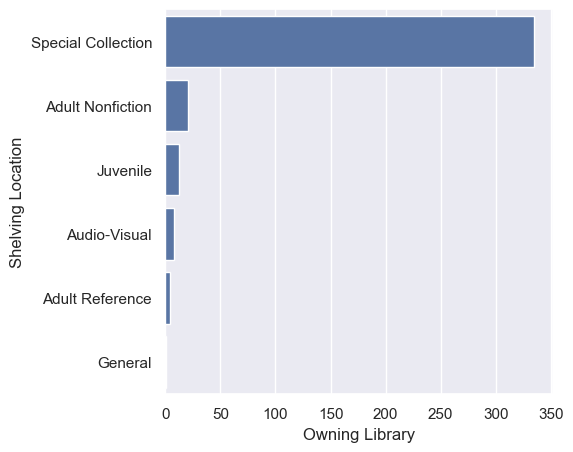

In [61]:
# Check by Location
# Most are in the special collection
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[(df["Published Year"].str.contains("c") | df["Published Year"].str.contains("u") | df['Published Year'].str.contains("[", regex=False)) & (df['Published Year'].notna())].groupby("Shelving Location").count()['Owning Library'].sort_values(ascending=False), orient='h')

### Barcode

Barcode seems like it should always be a number. 

Notes:
- Barcode can contain "On Order" if a record is on order
- Also one that seems like an error where Barcode is "Lumberjack" for an ILL item


In [62]:
#let's try just converting to numeric
pd.to_numeric(df['Barcode'])

ValueError: Unable to parse string "On Order 1650827" at position 12933

In [63]:
df[df['Barcode'].str.contains("On Order")& (df["Barcode"].notna())].shape

(608, 42)

In [64]:
df[df['Barcode'].str.contains("On Order")& (df["Barcode"].notna())].head()

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
12933,Westminster Forbush Memorial Library,Audio-Visual,NaN,On Order1650827,NaN,NaN,On order,Audio,On Order 1650827,5123618,https://bark.cwmars.org/opac/extras/ac/jacket/...,Small Things Like These (DVD),NaN,"[United States] : Lionsgate, 2025.",2024,NaN,NaN,32.99,2025-01-30 17:53:55.701582-05:00,NaN,2025-01-30 17:53:55.701582-05:00,2025-01-30 17:53:55.701582-05:00,NaT,0,0,0,9,-,-,DVD,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1650827,False,22583303
12934,Westminster Forbush Memorial Library,Audio-Visual,NaN,On Order1650839,NaN,NaN,On order,Audio,On Order 1650839,5135234,https://bark.cwmars.org/opac/extras/ac/jacket/...,Room for Everyone,NaN,"[United States] : Dreamscape Media, 2025.",2025,"{""9781666639797 :""}",NaN,38.99,2025-01-30 17:54:27.039639-05:00,NaN,2025-01-30 17:54:27.039639-05:00,2025-01-30 17:54:27.039639-05:00,NaT,0,0,0,0,-,-,DVD,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1650839,False,22583322
12935,Westminster Forbush Memorial Library,Audio-Visual,NaN,On Order1650852,NaN,NaN,On order,Audio,On Order 1650852,5135237,https://bark.cwmars.org/opac/extras/ac/jacket/...,Room for Everyone,NaN,"[United States] : Dreamscape Media, 2025.",2025,"{""9781666639797 :""}",NaN,38.99,2025-01-30 17:54:27.644805-05:00,NaN,2025-01-30 17:54:27.644805-05:00,2025-01-30 17:54:27.644805-05:00,NaT,0,0,0,0,-,-,DVD,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1650852,False,22583331
12936,Westminster Forbush Memorial Library,Audio-Visual,NaN,On Order1652036,NaN,NaN,On order,Audio,On Order 1652036,5135533,https://bark.cwmars.org/opac/extras/ac/jacket/...,Children's Books to the Big Screen,NaN,"[United States] : Binge Box, 2024.",2024,NaN,NaN,141.99,2025-01-31 14:11:21.728507-05:00,NaN,2025-01-31 14:11:21.728507-05:00,2025-01-31 14:11:21.728507-05:00,NaT,0,0,0,0,-,-,DVD,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,ocolc 1461599780,ON_ORDER1652036,False,22585185
12937,Westminster Forbush Memorial Library,Audio-Visual,NaN,On Order1652038,NaN,NaN,On order,Audio,On Order 1652038,5135535,https://bark.cwmars.org/opac/extras/ac/jacket/...,Naruto Complete Series,NaN,"[United States] : Viz Media, 2025.",2025,NaN,NaN,342.99,2025-01-31 14:11:22.052736-05:00,NaN,2025-01-31 14:11:22.052736-05:00,2025-01-31 14:11:22.052736-05:00,NaT,0,0,0,0,-,-,Blu-ray,NaN,NaN,No Format Applied,-,True,True,NaN,NaN,NaN,ON_ORDER1652038,False,22585187


<Axes: xlabel='Owning Library', ylabel='Item Status'>

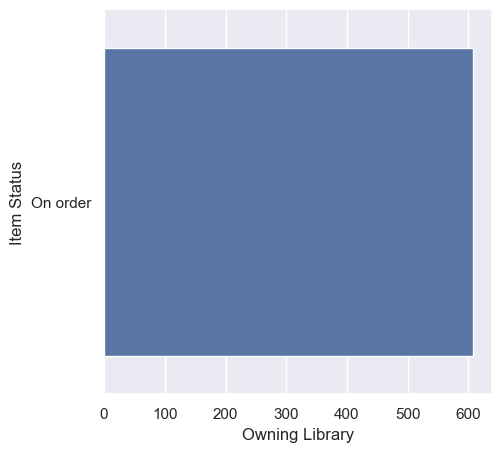

In [65]:
# Check by Item Status
fig, ax = plt.subplots(figsize = (5,5))
sns.barplot(data=df[df['Barcode'].str.contains("On Order", na=False)& (df["Barcode"].notna())].groupby("Item Status").count()['Owning Library'].sort_values(ascending=False), orient='h')

In [66]:
pd.to_numeric(df[(~df['Barcode'].str.contains("On Order", na=False))& (df["Barcode"].notna())]['Barcode'])

ValueError: Unable to parse string "Lumberjack" at position 12933

In [67]:
df[df['Barcode']=="Lumberjack"]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
12938,Westminster Forbush Memorial Library,DO NOT USE,NaN,228375522,NaN,NaN,Available,No Circ Modifier Applied,Lumberjack,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2024-12-03 11:16:09-05:00,2024-12-03 11:19:25.347842-05:00,2024-12-03 11:19:25.347842-05:00,2024-12-03 11:19:25.347842-05:00,NaT,0,0,0,54,-,-,Book,Adult,Books,No Format Applied,-,True,True,NaN,NaN,NaN,228375522_000000000000000,False,22497321


In [68]:
df[df['Shelving Location']=="DO NOT USE"]['Barcode']

12938    Lumberjack
12939     225202360
12940     230119600
12941       1393820
12942     224108360
            ...    
12987     228830688
12988     228462681
12989     228375233
12990     226119324
12991     226119330
Name: Barcode, Length: 54, dtype: object

### Shelving Location

Correspond to physical locations in the library

In [69]:
df['Shelving Location'].value_counts().index.to_list()

['Juvenile',
 'General',
 'Adult Nonfiction',
 'Audio-Visual',
 'Young Adult',
 'Kendig Room',
 'Special Collection',
 'Adult Reference',
 'DO NOT USE',
 'Juvenile Reference']

<Axes: xlabel='count', ylabel='Shelving Location'>

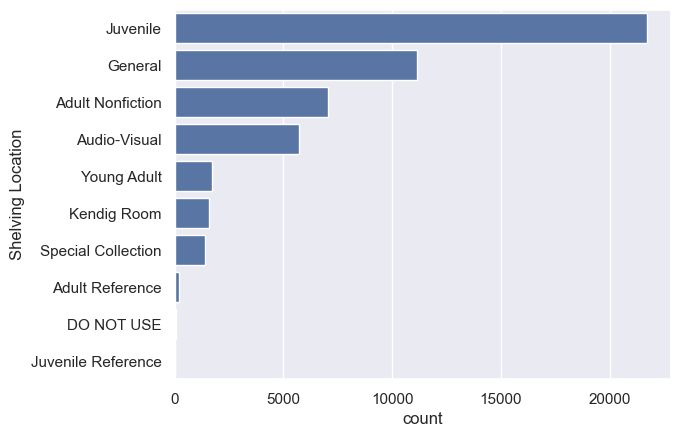

In [70]:
# Biggest collection is Juvenile. Probably because the "Adult" section is broken into parts but Juvenile is not
# Kendig room is a separate room so that's an interesting datapoint since what is in that section could change
sns.countplot(data=df, y="Shelving Location", order=df['Shelving Location'].value_counts().index.to_list())

DO NOT USE is apparently what they use to categorize some ILL (Inter Library Loan items). There aren't many (54) so these must be special items or something that is reused for this kind of circulation.

In [71]:
df[df["Shelving Location"]=="DO NOT USE"].shape

(54, 42)

In [72]:
df[df["Shelving Location"]=="DO NOT USE"].sample(5)

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
12954,Westminster Forbush Memorial Library,DO NOT USE,NaN,Gila,NaN,NaN,Checked out,NaN,230527833,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2025-04-15 14:05:34-04:00,2025-04-15 14:06:04.572718-04:00,2025-04-15 14:06:04.572718-04:00,2025-04-15 14:06:04.572718-04:00,NaT,1,1,0,54,-,-,Book,Adult,Video cassettes/discs/DVD,NaN,-,True,True,NaN,NaN,NaN,GILA,False,22718301
12980,Westminster Forbush Memorial Library,DO NOT USE,NaN,Team of One,NaN,NaN,Available,No Circ Modifier Applied,225771049,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2024-06-20 11:39:27-04:00,2024-06-20 11:40:04-04:00,2024-06-27 11:22:18.962335-04:00,2024-06-27 11:22:18.962335-04:00,2024-06-20,1,0,1,54,-,-,Book,Adult,Books,No Format Applied,-,True,True,NaN,NaN,NaN,TEAM_OF_ONE,False,22236427
12971,Westminster Forbush Memorial Library,DO NOT USE,NaN,Red Horse Hill,NaN,NaN,Available,No Circ Modifier Applied,229689106,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2025-02-28 10:19:06-05:00,2025-02-28 10:20:36-05:00,2025-03-13 12:13:11.519718-04:00,2025-03-13 12:13:11.519718-04:00,2025-02-28,1,1,0,54,-,-,Book,Adult,Books,No Format Applied,-,True,True,NaN,NaN,NaN,RED_HORSE_HILL,False,22641163
12973,Westminster Forbush Memorial Library,DO NOT USE,NaN,River of the Wolves,NaN,NaN,Available,No Circ Modifier Applied,228375521,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2024-12-03 11:00:58-05:00,2024-12-03 11:01:22-05:00,2024-12-27 10:25:07.413216-05:00,2024-12-27 10:25:07.413216-05:00,2024-12-22,2,0,2,54,-,-,Book,Adult,Books,No Format Applied,-,True,True,NaN,NaN,NaN,RIVER_OF_THE_WOLVES,False,22497245
12940,Westminster Forbush Memorial Library,DO NOT USE,NaN,A Blow for Liberty,NaN,NaN,Available,No Circ Modifier Applied,230119600,4552889,https://bark.cwmars.org/opac/extras/ac/jacket/...,WESTMINSTER ILL ITEM,NaN,NaN,NaN,NaN,NaN,0.0,2025-03-25 10:23:07-04:00,2025-03-25 10:23:46-04:00,2025-04-03 11:22:08.013194-04:00,2025-04-03 11:22:08.013194-04:00,2025-03-25,1,1,0,54,-,-,Book,Childrens,Books,No Format Applied,-,True,True,NaN,NaN,NaN,A_BLOW_FOR_LIBERTY,False,22682399


Juvenile Reference has 1 item. My guess is it should have zero items. Well... not my guess. My wife who runs the childrens library said she doesn't want the category, so is removing it :D

In [73]:
df[df["Shelving Location"]=="Juvenile Reference"].shape

(1, 42)

In [74]:
df[df["Shelving Location"]=="Juvenile Reference"]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID
45872,Westminster Forbush Memorial Library,Juvenile Reference,NaN,JREF 372.21 DIAM,NaN,NaN,Library Use Only,Juv Reference,37365002815672,857257,https://bark.cwmars.org/opac/extras/ac/jacket/...,Mother Goose on the loose : a handbook and CD-...,"Diamant-Cohen, Betsy.","New York : Neal-Schuman Publishers, c2006.",2006,"{""1555705367 (looseleaf binder and cd-rom : al...",NaN,93.0,2018-04-24 13:38:49-04:00,2018-06-20 10:06:52.811179-04:00,2018-06-20 10:06:52.811179-04:00,2018-06-20 10:06:52.811179-04:00,NaT,0,0,0,6,Check In Alert / Check Out Alert - CHECK FOR 1...,-,Book,Childrens,Books,Juv Reference,-,True,True,NaN,NaN,ocolc 62728508,JREF_372_210000000000000_DIAM,False,18390400


## Categorical Quality Notes

Notes:

Overall the categories with missing data make sense. Some things like Published Year and Barcode with odd entries or maybe some workarounds. 
There are a handful of items with missing Title. Not enough to affect analysis, but might be flagged for DQ fixes.

- If Published Year is not a number it's usually because there are multiple dates or the exact date is unknown. So it's saved as a string with e.g. 19uu as the entry
- If the item is On Order, then it is not a number because the barcode contains "On Order" in the field. Not clear why this is the case instead of null or something. Maybe a placeholder to indicate it needs to be updated.
- Some odd instances like "Lumberjack" in the barcode field
- Title is missing in 2 items
- Circ modifier missing in 1 item
- not clear if Author should be missing, but it is in DVDs and a few other items.

# EDA

Yay finally the fun stuff. Let's look at the actual fields and draw some conclusions.

## Circulations

To look at circulations using the PY field, we want to split the analysis between those items that existed the whole "PY" (in this case 2024) and those that were added in 2024. Otherwise items that were added in, say, Dec 2024 but didn't circulate would be compared to those that were on the shelf all of 2024.

In [75]:
# Adding flag for items added after the start of 2024
compare_date = datetime.datetime.strptime("2024-01-01 0:0:00","%Y-%m-%d %H:%M:%S")
cutoff_date = datetime.datetime.strptime("2025-01-01 0:0:00","%Y-%m-%d %H:%M:%S")
df["create_date"] = pd.to_datetime(df['Create Date/Time'], utc=True)
df['create_date'] = df['create_date'].dt.date
#drop items added in 2025
df = df[df['create_date']<cutoff_date.date()]
df['added_2024'] = np.where(df['create_date']>compare_date.date(),"Newly Added","Existing" )

In [76]:
df[['Total Circs', "CY Circs", "PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

Total Circs         CY Circs        PY Circs       
                         count     sum    count    sum    count    sum
Shelving Location                                                     
Juvenile                 21272  342019    21272  10895    21272  39002
General                  10286  107044    10286   3225    10286  12866
Adult Nonfiction          6860   54177     6860   1591     6860   6141
Audio-Visual              5646  143613     5646   1790     5646   7011
Young Adult               1661   16810     1661    472     1661   2193
Kendig Room               1545   16030     1545    575     1545   2486
Special Collection        1386      60     1386      0     1386      0
Adult Reference            203       2      203      0      203      0
DO NOT USE                  40      59       40      2       40     57
Juvenile Reference           1       0        1      0        1      0

Looking at total circs in the system (number of times something circulated) We should see every item in the system. Count will give us how many records exist (multiple items may exist under one record, so this isn't the number of items in the library). 

Something odd about Adult Refrence though. Two circs? But I should probably check if these can be circulated. Reference materials maybe can't be checked out.

Let's check the Circ Modifier field and Item Status. They have indications on whether they are "circulating" or not.

In [77]:
# Noncirculating items

df[df['Circ Modifier']=="Noncirculating"][['Total Circs', "CY Circs", "PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

Total Circs     CY Circs     PY Circs    
                         count sum    count sum    count sum
Shelving Location                                           
Special Collection        1191  34     1191   0     1191   0
Juvenile                     5   0        5   0        5   0
Adult Reference              4   0        4   0        4   0
Adult Nonfiction             2   6        2   0        2   0
Young Adult                  1   0        1   0        1   0

In [78]:
df[df['Item Status']=="Library Use Only"][['Total Circs', "CY Circs", "PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

Total Circs     CY Circs     PY Circs    
                         count sum    count sum    count sum
Shelving Location                                           
Special Collection        1379  57     1379   0     1379   0
Adult Reference            173   0      173   0      173   0
Juvenile                    23  17       23   0       23   0
Young Adult                 15   0       15   0       15   0
Adult Nonfiction             2   6        2   0        2   0
Juvenile Reference           1   0        1   0        1   0

Looks like apart from a handful of times for the "Special Collection" the Noncirculating and Library Use Only items have not circulated in the past. None of them have circulated in the current year (CY) or previous year (PY)

So to look at only circulating items I'm going to drop those from analysis. 
I'm also going to remove the DO NOT USE items just because it seems like maybe I shouldn't use them.

In [79]:
df_circulating = df[(df["Shelving Location"]!="DO NOT USE") & (df["Item Status"]!="Library Use Only") & (df['Circ Modifier']!="Noncirculating")]

In [80]:
df_circulating.shape

(47259, 44)

In [81]:
# Repeat but only with circulating items
df_circulating[['Total Circs', "CY Circs", "PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

Total Circs         CY Circs        PY Circs       
                         count     sum    count    sum    count    sum
Shelving Location                                                     
Juvenile                 21247  342002    21247  10895    21247  39002
General                  10286  107044    10286   3225    10286  12866
Adult Nonfiction          6858   54171     6858   1591     6858   6141
Audio-Visual              5646  143613     5646   1790     5646   7011
Young Adult               1646   16810     1646    472     1646   2193
Kendig Room               1545   16030     1545    575     1545   2486
Adult Reference             30       2       30      0       30      0
Special Collection           1       2        1      0        1      0

Adult Reference and Special Collection items haven't circulated at all in the past year and only twice each in the dataset, so I'm going to also drop those categories from any analysis

In [82]:
df_circulating = df_circulating[~df_circulating["Shelving Location"].isin(["Special Collection", "Adult Reference"])]

In [83]:
# Final dataset
df_circulating[['Total Circs', "CY Circs", "PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

Total Circs         CY Circs        PY Circs       
                        count     sum    count    sum    count    sum
Shelving Location                                                    
Juvenile                21247  342002    21247  10895    21247  39002
General                 10286  107044    10286   3225    10286  12866
Adult Nonfiction         6858   54171     6858   1591     6858   6141
Audio-Visual             5646  143613     5646   1790     5646   7011
Young Adult              1646   16810     1646    472     1646   2193
Kendig Room              1545   16030     1545    575     1545   2486

### Circ Ratios

One potential indicator of whether or not a section of the library is seeing traffic, could be the ratio of number of circulations/number of items. If there are an abundance of items that do not circulate, then you would expect this ratio to be low, while if most of your items circulate at least once per year, this would be at least 1 or higher.

Let's look at CY Circs and PY circs since those are a recent indicator of current items. Maybe total circs would be a relevant metric as well, so I'll include it, but given the collection changes frequently it may not be very useful.

In [84]:

circ_ratios = df_circulating[['Total Circs', "CY Circs", "PY Circs", "added_2024","Shelving Location"]].groupby(["Shelving Location","added_2024"]).agg({'sum', 'count'}).sort_values(by=("Total Circs", "count"), ascending=False)

In [85]:
circ_ratios.sort_index()

Total Circs         CY Circs       PY Circs       
                                    count     sum    count   sum    count    sum
Shelving Location added_2024                                                    
Adult Nonfiction  Existing           6164   52104     6164  1106     6164   4559
                  Newly Added         694    2067      694   485      694   1582
Audio-Visual      Existing           5408  142492     5408  1571     5408   6109
                  Newly Added         238    1121      238   219      238    902
General           Existing           8827  100805     8827  1855     8827   7997
                  Newly Added        1459    6239     1459  1370     1459   4869
Juvenile          Existing          19367  334751    19367  8800    19367  33846
                  Newly Added        1880    7251     1880  2095     1880   5156
Kendig Room       Existing           1270   14978     1270   364     1270   1645
                  Newly Added         275    1052      275   211      275    841
Young Adult       Existing           1395   16305     1395   384     1395   1776
                  Newly Added         251     505      251    88      251    417

In [86]:
circ_ratios.columns = ['_'.join(col) for col in circ_ratios.columns]
circ_ratios.reset_index(inplace=True)

In [87]:
cols = ['Total Circs', "CY Circs", "PY Circs"]
for col in cols:
    circ_ratios[col+"_ratio"] = circ_ratios[col+"_sum"] / circ_ratios[col+"_count"]

In [88]:
circ_ratios['Total Circs_sum']/circ_ratios['Total Circs_count']

0     17.284608
1     11.420075
2      8.452953
3     26.348373
4      3.856915
5      4.276217
6     11.688172
7     11.793701
8      2.978386
9      3.825455
10     2.011952
11     4.710084
dtype: float64

In [89]:
circ_ratios.sort_values(by=["Shelving Location"], ascending=False)

,Shelving Location,added_2024,Total Circs_count,Total Circs_sum,CY Circs_count,CY Circs_sum,PY Circs_count,PY Circs_sum,Total Circs_ratio,CY Circs_ratio,PY Circs_ratio
6,Young Adult,Existing,1395,16305,1395,384,1395,1776,11.688172,0.275269,1.273118
10,Young Adult,Newly Added,251,505,251,88,251,417,2.011952,0.350598,1.661355
7,Kendig Room,Existing,1270,14978,1270,364,1270,1645,11.793701,0.286614,1.295276
9,Kendig Room,Newly Added,275,1052,275,211,275,841,3.825455,0.767273,3.058182
0,Juvenile,Existing,19367,334751,19367,8800,19367,33846,17.284608,0.454381,1.747612
4,Juvenile,Newly Added,1880,7251,1880,2095,1880,5156,3.856915,1.114362,2.742553
1,General,Existing,8827,100805,8827,1855,8827,7997,11.420075,0.210151,0.905970
5,General,Newly Added,1459,6239,1459,1370,1459,4869,4.276217,0.938999,3.337217
3,Audio-Visual,Existing,5408,142492,5408,1571,5408,6109,26.348373,0.290496,1.129623
11,Audio-Visual,Newly Added,238,1121,238,219,238,902,4.710084,0.920168,3.789916


Looking at the ratios, 

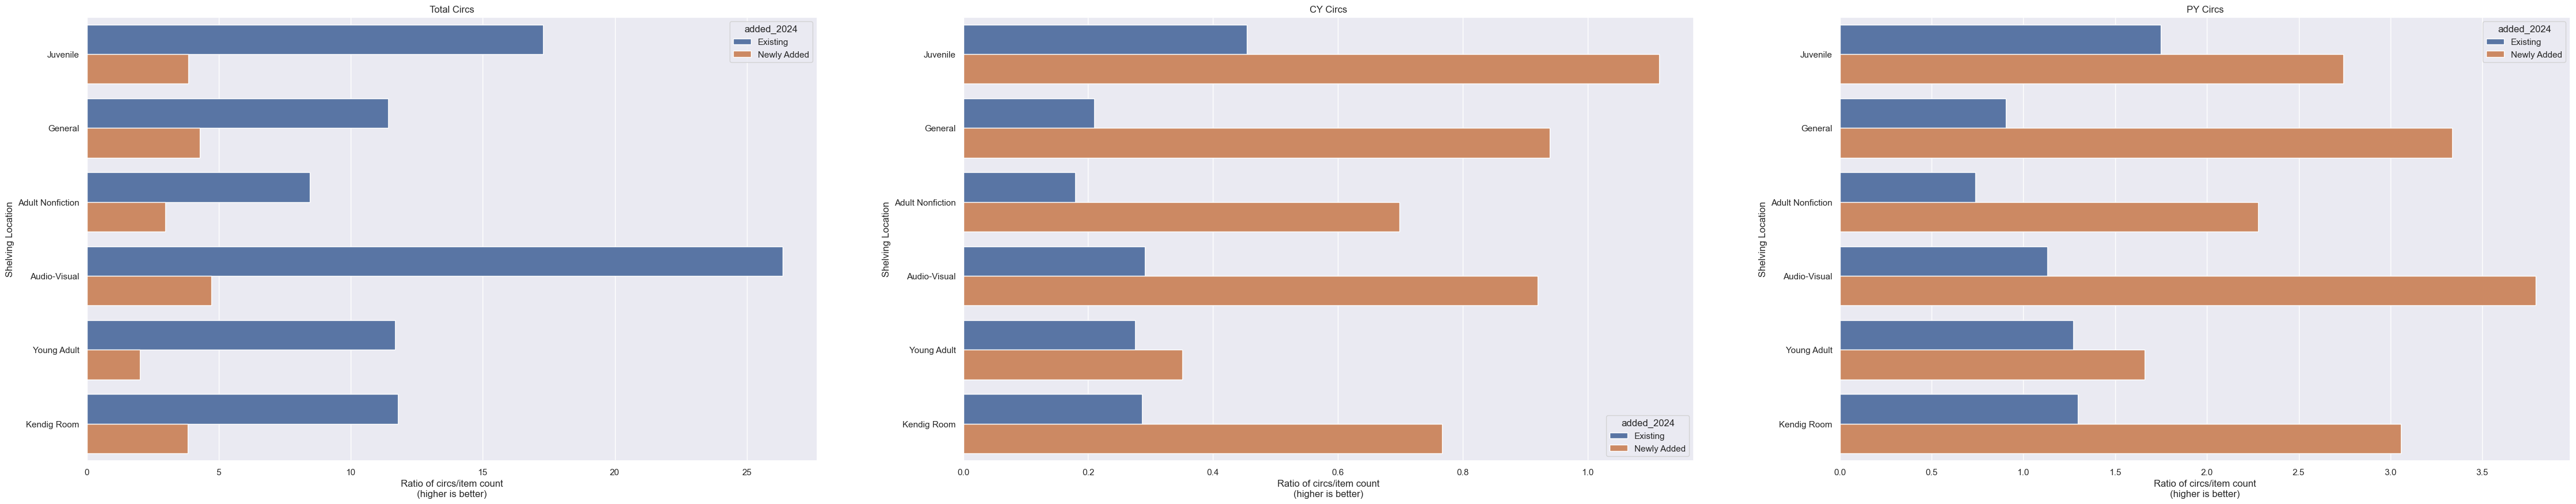

In [90]:
fig, (ax1,ax2, ax3) = plt.subplots(ncols = 3, figsize = (15,10))
g1 = sns.barplot(x=circ_ratios['Total Circs_ratio'], y=circ_ratios['Shelving Location'], hue=circ_ratios['added_2024'],ax=ax1)
g2 = sns.barplot(x=circ_ratios['CY Circs_ratio'], y=circ_ratios['Shelving Location'],hue=circ_ratios['added_2024'], ax=ax2)
g3 = sns.barplot(x=circ_ratios['PY Circs_ratio'], y=circ_ratios['Shelving Location'], hue=circ_ratios['added_2024'],ax=ax3)
g1.set_title("Total Circs")
g1.set_xlabel("Ratio of circs/item count\n(higher is better)")
g2.set_title("CY Circs")
g2.set_xlabel("Ratio of circs/item count\n(higher is better)")
g3.set_title("PY Circs")
g3.set_xlabel("Ratio of circs/item count\n(higher is better)")
plt.subplots_adjust(right=3)

Text(0.5, 0, 'Average Circulations (Circs/Item)\n(higher is better)')

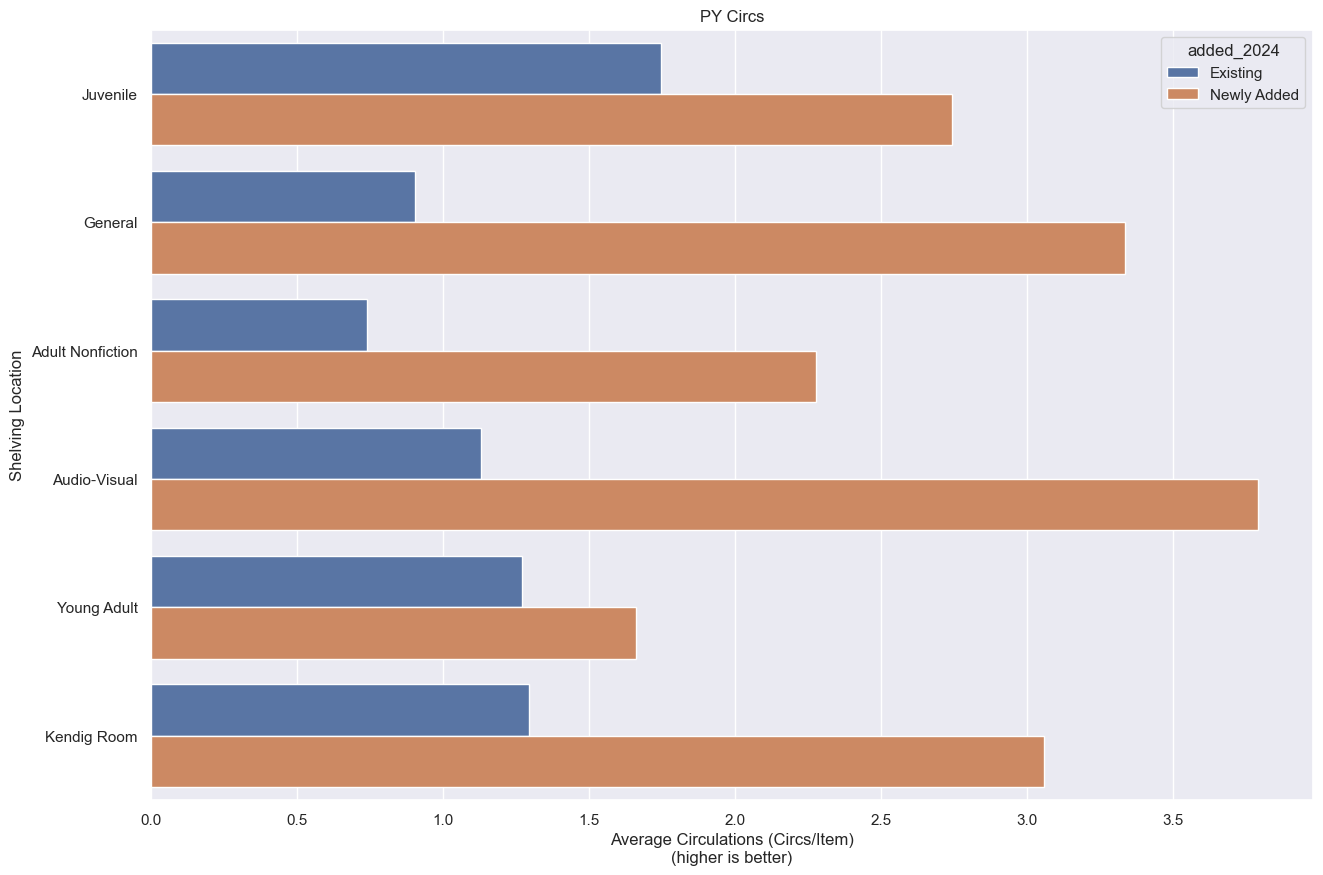

In [91]:
fig, ax1 = plt.subplots(figsize = (15,10))
g3 = sns.barplot(x=circ_ratios['PY Circs_ratio'], y=circ_ratios['Shelving Location'], hue=circ_ratios['added_2024'],ax=ax1)
g3.set_title("PY Circs")
g3.set_xlabel("Average Circulations (Circs/Item)\n(higher is better)")


Hard to draw any real conclusions from the first two plots. Total circs shows that audio-visual get the most circs per item with 25 overall followed by childrens books. For the current year CY Juvenile books are leading the way, so perhaps an indicator of the most often checked out? Kind of speculating from one plot though since we're only in April of this year. 

PY (previous year) is probably the most helpful:

Juvenile and "Kendig Room" show the most number of circulations per number of items (for those that existed all of 2024 'blue'). So these are checked out at a higher volume relative to their number. I have a good source that tells me the Kendig Room has the large print books. 

The poorest performer by this metric is the Adult Nonfiction. For last year, the nonfiction did not check out more times than the number. There is a smaller number of nonfiction records than either "General" or "Juvenile" so having a high volume wouldn't explain why there is a smaller ratio. "General" on the other hand is the exception where it seems to be a kind of catch-all for fiction and everything else. It would be interesting to break these down into more categories. 

The other thing to note is that for all categories, things added after Jan 1 2024 were checked out at a higher ratio than things that existed prior. So people like new stuff. That's especially true for Audio-Visual and the Kendig-Room. Interestingly, Young Adult is barely any different. Maybe an indicator of traffic?

### Zero Circs

Maybe another factor to indicate a "healthy" section would be to see few items with "zero circs" or that didn't circulate at all during a year. I'm just going to look at PY for this since Total Circs and CY wouldn't give that information.


In [92]:
#get all of the items that did circ (nonzero number of circs)
nonzero_circs = df_circulating[df_circulating['PY Circs']!=0][["PY Circs", "Shelving Location",'added_2024']].groupby(["Shelving Location",'added_2024']).count()
circ_counts = df_circulating[["PY Circs", "Shelving Location", 'added_2024']].groupby(["Shelving Location",'added_2024']).count()

In [93]:
circ_counts

PY Circs
Shelving Location added_2024           
Adult Nonfiction  Existing         6164
                  Newly Added       694
Audio-Visual      Existing         5408
                  Newly Added       238
General           Existing         8827
                  Newly Added      1459
Juvenile          Existing        19367
                  Newly Added      1880
Kendig Room       Existing         1270
                  Newly Added       275
Young Adult       Existing         1395
                  Newly Added       251

Text(0.5, 0, 'Proportion of Items that Circulated\n(Higher is better)')

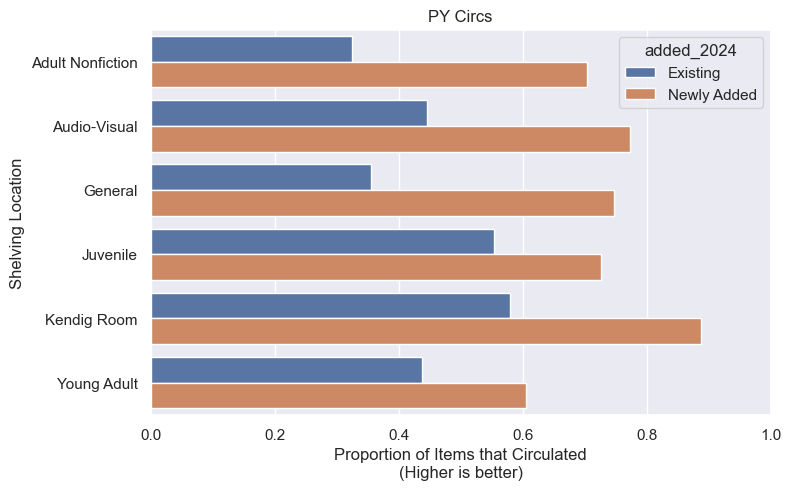

In [94]:
fig,ax = plt.subplots( figsize = (8,5))
temp_data = nonzero_circs/circ_counts

g1 = sns.barplot(data = temp_data.reset_index(), x= "PY Circs", y="Shelving Location", hue='added_2024', orient='h')
g1.set_title("PY Circs")
g1.set_xbound(0,1)
g1.set_xlabel("Proportion of Items that Circulated\n(Higher is better)")

For the ratio of nonzero circs, we can think of it like this: If every item in the collection circulated at least once, the ratio would be 1.0. 

So a ratio of 0.6 means about 60% of the collection in that location circulated at least once last year. For higher volumes in a collection (e.g. for General, Juvenile, or Adult Nonfiction) having every item circulate would be difficult. And you probably want to have a variety of items available even if they aren't in constant circulation. 

I've also split it by those that existed prior to 2024 and those that were added sometime in 2024 to isolate the collection that existed vs added during the year. Across the categories, all areas had a higher proportion of the recently added items circulate than the proportion of existing items. Juvenile and Kendig room have the highest proportion of the existing collection circulate while Adult Nonfiction and General have the lowest proportion of the existing collection circulate. 

## Library makeup vs. circulations

In [95]:
total_py_circs = df_circulating[["PY Circs", "Shelving Location"]].groupby("Shelving Location").agg({'sum', 'count'}).sort_values(by=("PY Circs", "count"), ascending=False)


In [96]:
total_py_circs[("PY Circs", 'Circulation')] = total_py_circs[("PY Circs", 'sum')]/total_py_circs[("PY Circs", 'sum')].sum()
total_py_circs[("PY Circs", 'Library')] = total_py_circs[("PY Circs", 'count')]/total_py_circs[("PY Circs", 'count')].sum()

total_py_circs.reset_index(inplace=True)

In [97]:
total_py_circs

Shelving Location PY Circs                             
                       count    sum Circulation   Library
0          Juvenile    21247  39002    0.559578  0.449881
1           General    10286  12866    0.184594  0.217795
2  Adult Nonfiction     6858   6141    0.088107  0.145210
3      Audio-Visual     5646   7011    0.100590  0.119548
4       Young Adult     1646   2193    0.031464  0.034852
5       Kendig Room     1545   2486    0.035668  0.032714

In [98]:
prop_data = pd.melt(total_py_circs, id_vars=[('Shelving Location',"")], value_vars=[("PY Circs", 'Circulation'), ("PY Circs",'Library')])
prop_data.columns = ["Shelving Location", 'PY Circs', 'proportion', 'value']

Text(0.5, 0, 'Proportion of items\nCirculation = proportion of circulations\nLibrary = proportion of collection')

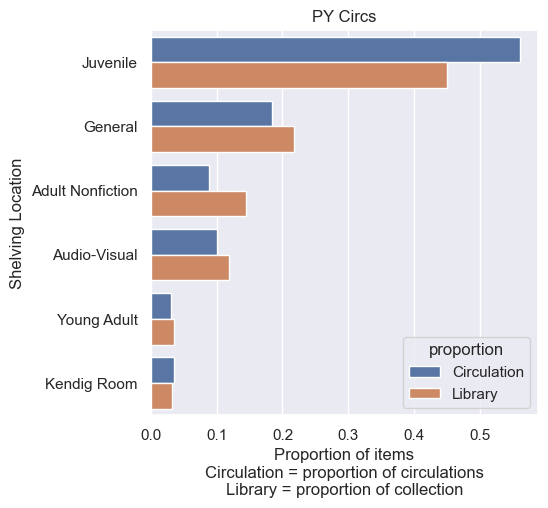

In [99]:
fig,ax = plt.subplots( figsize = (5,5))

g1 = sns.barplot(data = prop_data, x= "value", y="Shelving Location", hue='proportion', ax=ax)
g1.set_title("PY Circs")
g1.set_xlabel("Proportion of items\nCirculation = proportion of circulations\nLibrary = proportion of collection")


This analysis can only go so far. Yes we can break down the collection by location, but that doesn't really tell us what people are checking out (unless the location is very obvious). Most of the locations are not particularly obvious and probably have quite a few different types of things. Not just books but other things as well. 

Let's look at a few different categories and see if there are any other things we can glean before getting some other data to supplement.

In [100]:
df_circulating[["Title","Catalog Icon","ARIS Age","ARIS Format","CWMARS Format","Library StatCat", "Shelving Location"]].sample(5)

,Title,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Shelving Location
29488,Miss Holly is too jolly!,Book,Childrens,Books,Juv Fiction Paperback,-,Juvenile
25766,Daniel learns to share,Book,Childrens,Books,Beginner Reader,-,Juvenile
45598,Wonder play : interactive & developmental game...,Book,Childrens,Books,Parenting,-,Juvenile
16693,The peach seed,Book,Adult,Books,Fiction,-,General
11901,Doctor Who. The power of the doctor,DVD,Adult,Video cassettes/discs/DVD,DVD,-,Audio-Visual


CWMARS Format does look a bit like a genre. Let's compare it to our shelving locations.

In [101]:
df_circulating["Shelving Location"].unique()

array(['Adult Nonfiction', 'Audio-Visual', 'General', 'Juvenile',
       'Kendig Room', 'Young Adult'], dtype=object)

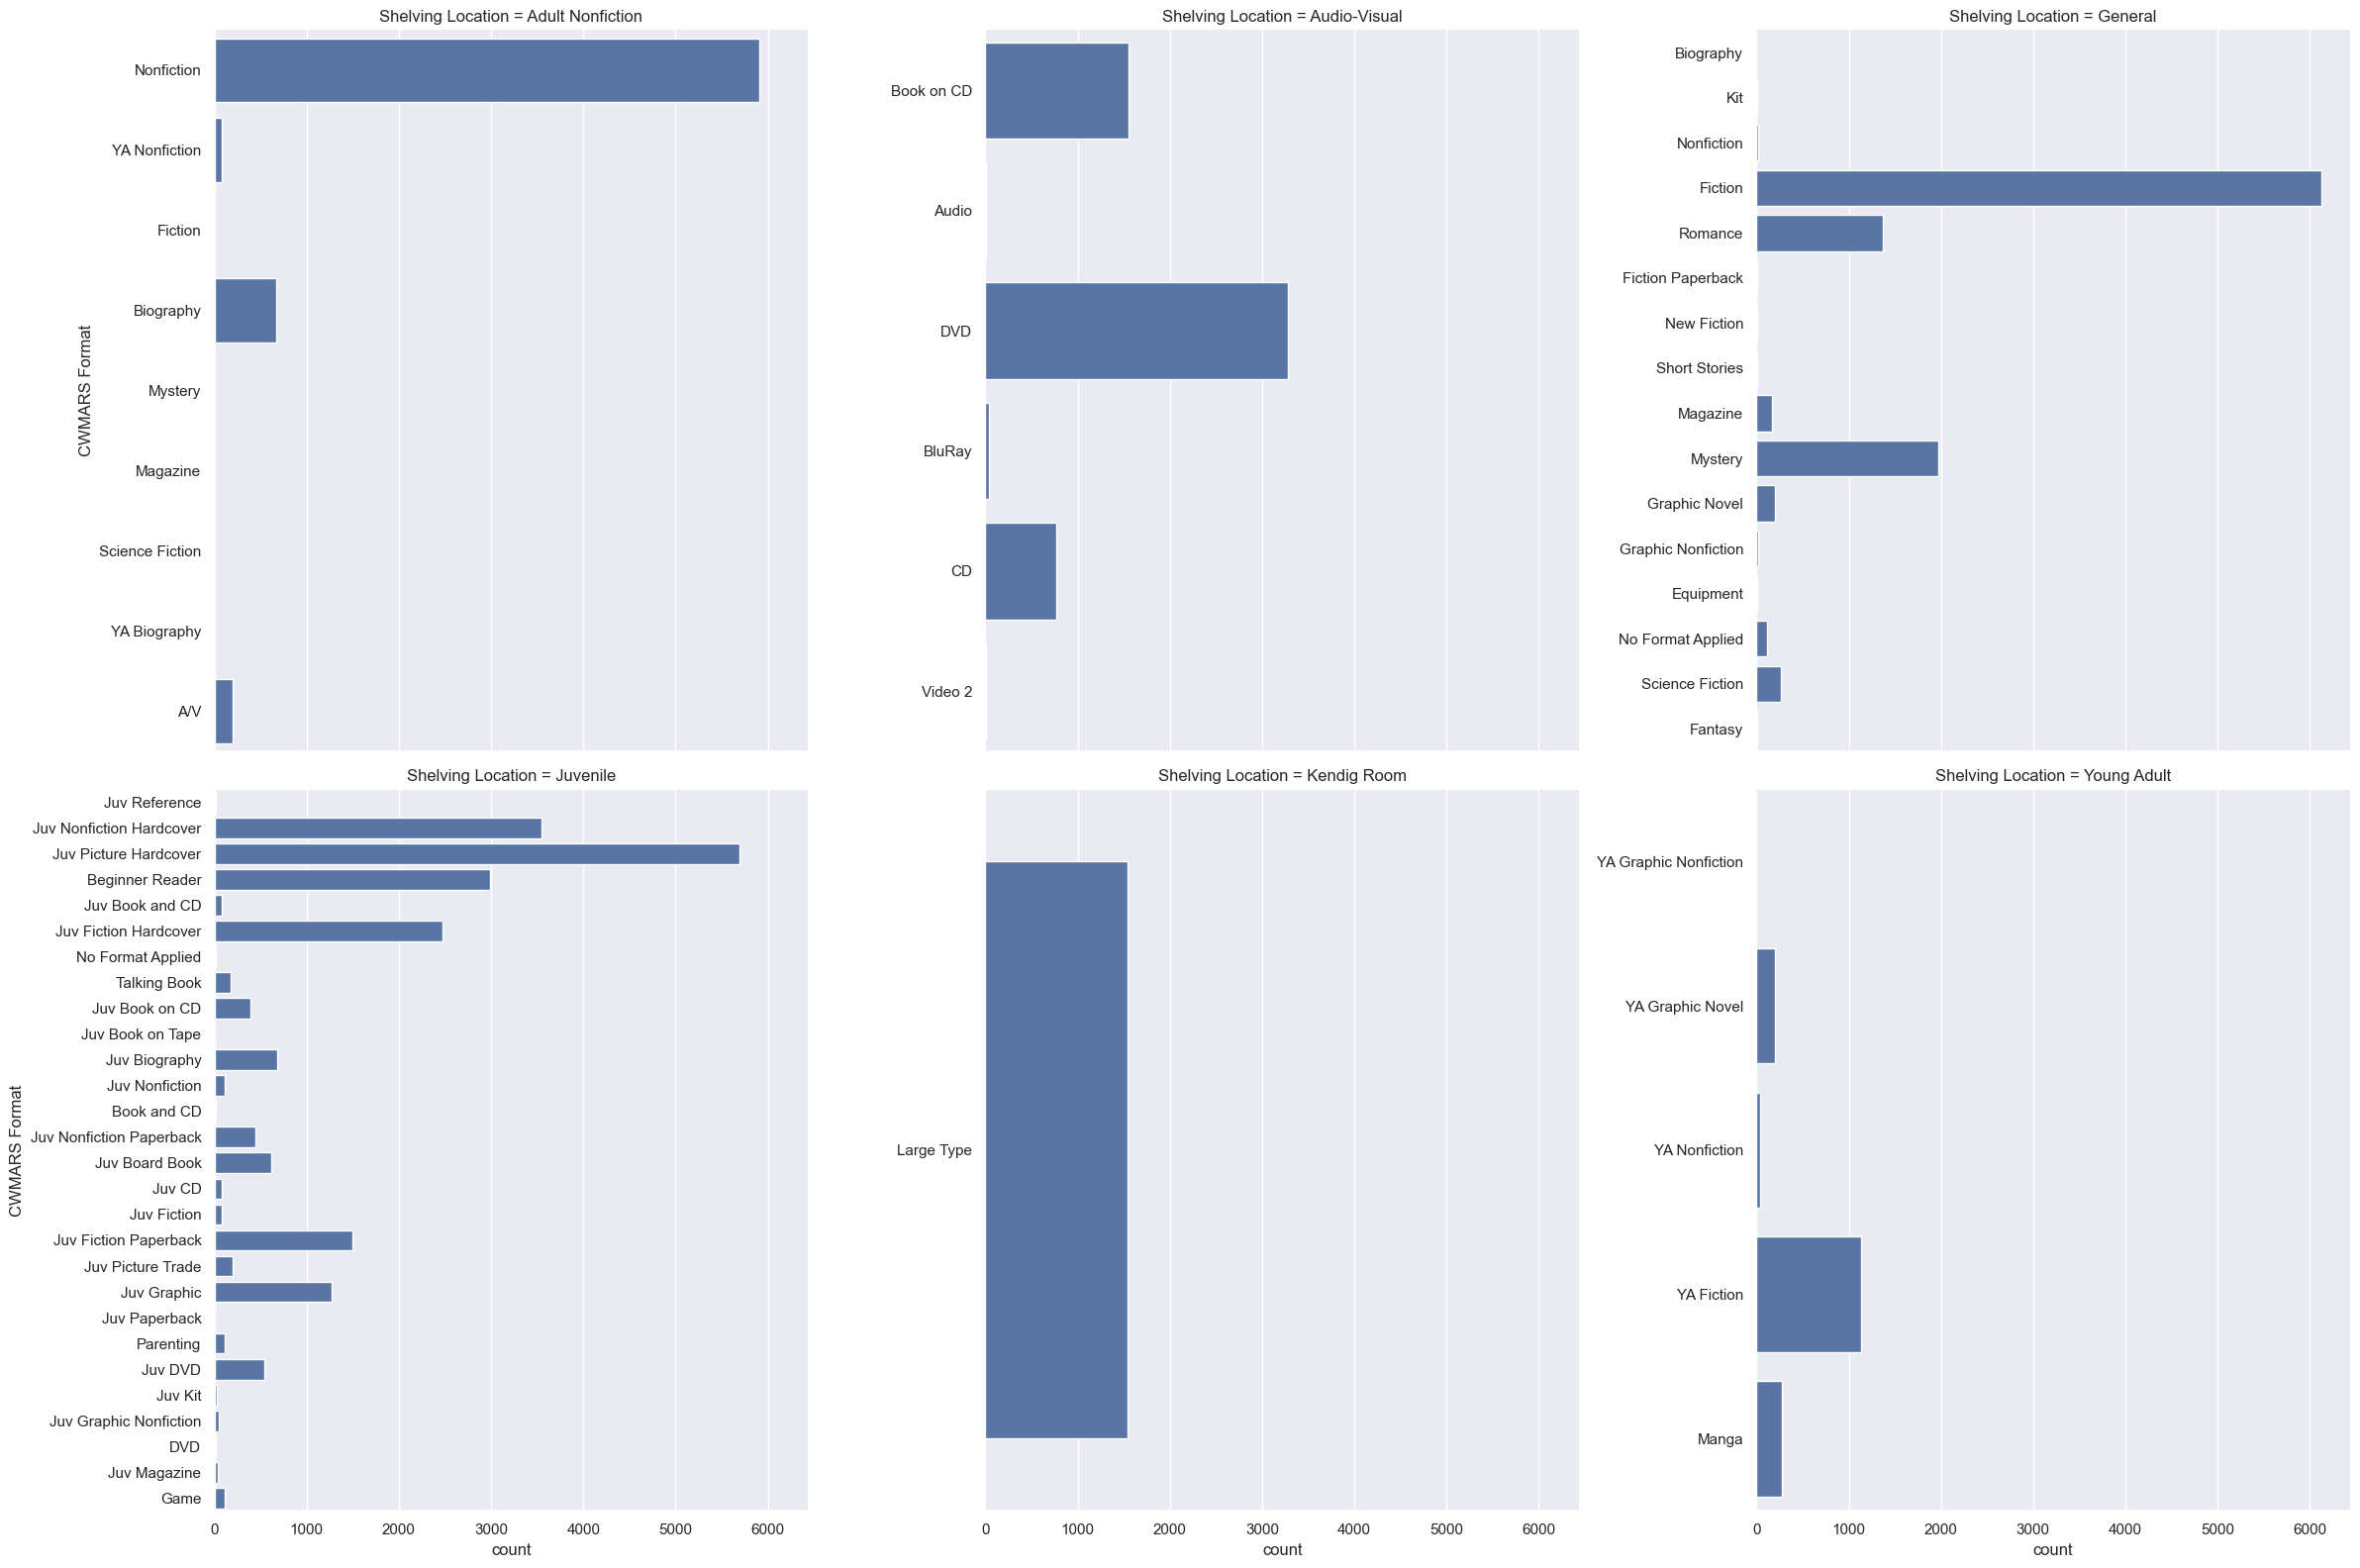

In [102]:
order = ['Adult Nonfiction', 'Audio-Visual', 'General', 'Juvenile',
       'Kendig Room', 'Young Adult']
g = sns.FacetGrid(df_circulating, col='Shelving Location', col_wrap=3,height=8, sharey=False, col_order=order)
g.map_dataframe(sns.countplot,y="CWMARS Format",)

Breaking down each location by the CWMARS format we get a bunch of different "types" of media. So we can see for instance that the Kendig Room is indeed exclusively Large Print books. Young Adult is predictably YA. General is a mixture of mostly fiction with some "Equipment", "Kit", and "Magazine". 

Juvenile seems the most diverse with different categories for various hardcovers, board books, paperback, etc. Let's do the same ratio exercise but with these additional categories in mind.

Since the "Total circ" didn't seem (to me) to be all that enlightening, to keep the number of plots down I'll just look at PY Circs to see how things did last year (2024)

## Circ Ratios by CWMARS Format

In [103]:
circ_ratios_cwmars = df_circulating[["PY Circs", "Shelving Location", "CWMARS Format", 'added_2024']].groupby(["Shelving Location", "CWMARS Format",'added_2024']).agg({'sum', 'count'}).sort_values(by=("PY Circs", "count"), ascending=False)
circ_ratios_cwmars.sort_index()

PY Circs     
                                                       count  sum
Shelving Location CWMARS Format         added_2024               
Adult Nonfiction  A/V                   Existing         186   99
                                        Newly Added       12   25
                  Biography             Existing         600  270
                                        Newly Added       67  170
                  Fiction               Existing           2    0
...                                                      ...  ...
Young Adult       YA Graphic Nonfiction Existing           1    2
                  YA Graphic Novel      Existing         137  196
                                        Newly Added       66  154
                  YA Nonfiction         Existing          25   82
                                        Newly Added       11   30

[107 rows x 2 columns]

In [104]:
circ_ratios_cwmars[("PY Circs", "ratio")] = circ_ratios_cwmars[("PY Circs", 'sum')]/circ_ratios_cwmars[("PY Circs", 'count')]

In [105]:
circ_ratios_cwmars.reset_index(inplace=True)

In [106]:
circ_ratios_cwmars.sort_values(by=['Shelving Location','CWMARS Format'])

Shelving Location          CWMARS Format   added_2024 PY Circs               
                                                             count  sum     ratio
32   Adult Nonfiction                    A/V     Existing      186   99  0.532258
74   Adult Nonfiction                    A/V  Newly Added       12   25  2.083333
17   Adult Nonfiction              Biography     Existing      600  270  0.450000
50   Adult Nonfiction              Biography  Newly Added       67  170  2.537313
91   Adult Nonfiction                Fiction     Existing        2    0  0.000000
..                ...                    ...          ...      ...  ...       ...
106       Young Adult  YA Graphic Nonfiction     Existing        1    2  2.000000
38        Young Adult       YA Graphic Novel     Existing      137  196  1.430657
51        Young Adult       YA Graphic Novel  Newly Added       66  154  2.333333
65        Young Adult          YA Nonfiction     Existing       25   82  3.280000
79        Young Adult          YA Nonfiction  Newly Added       11   30  2.727273

[107 rows x 6 columns]

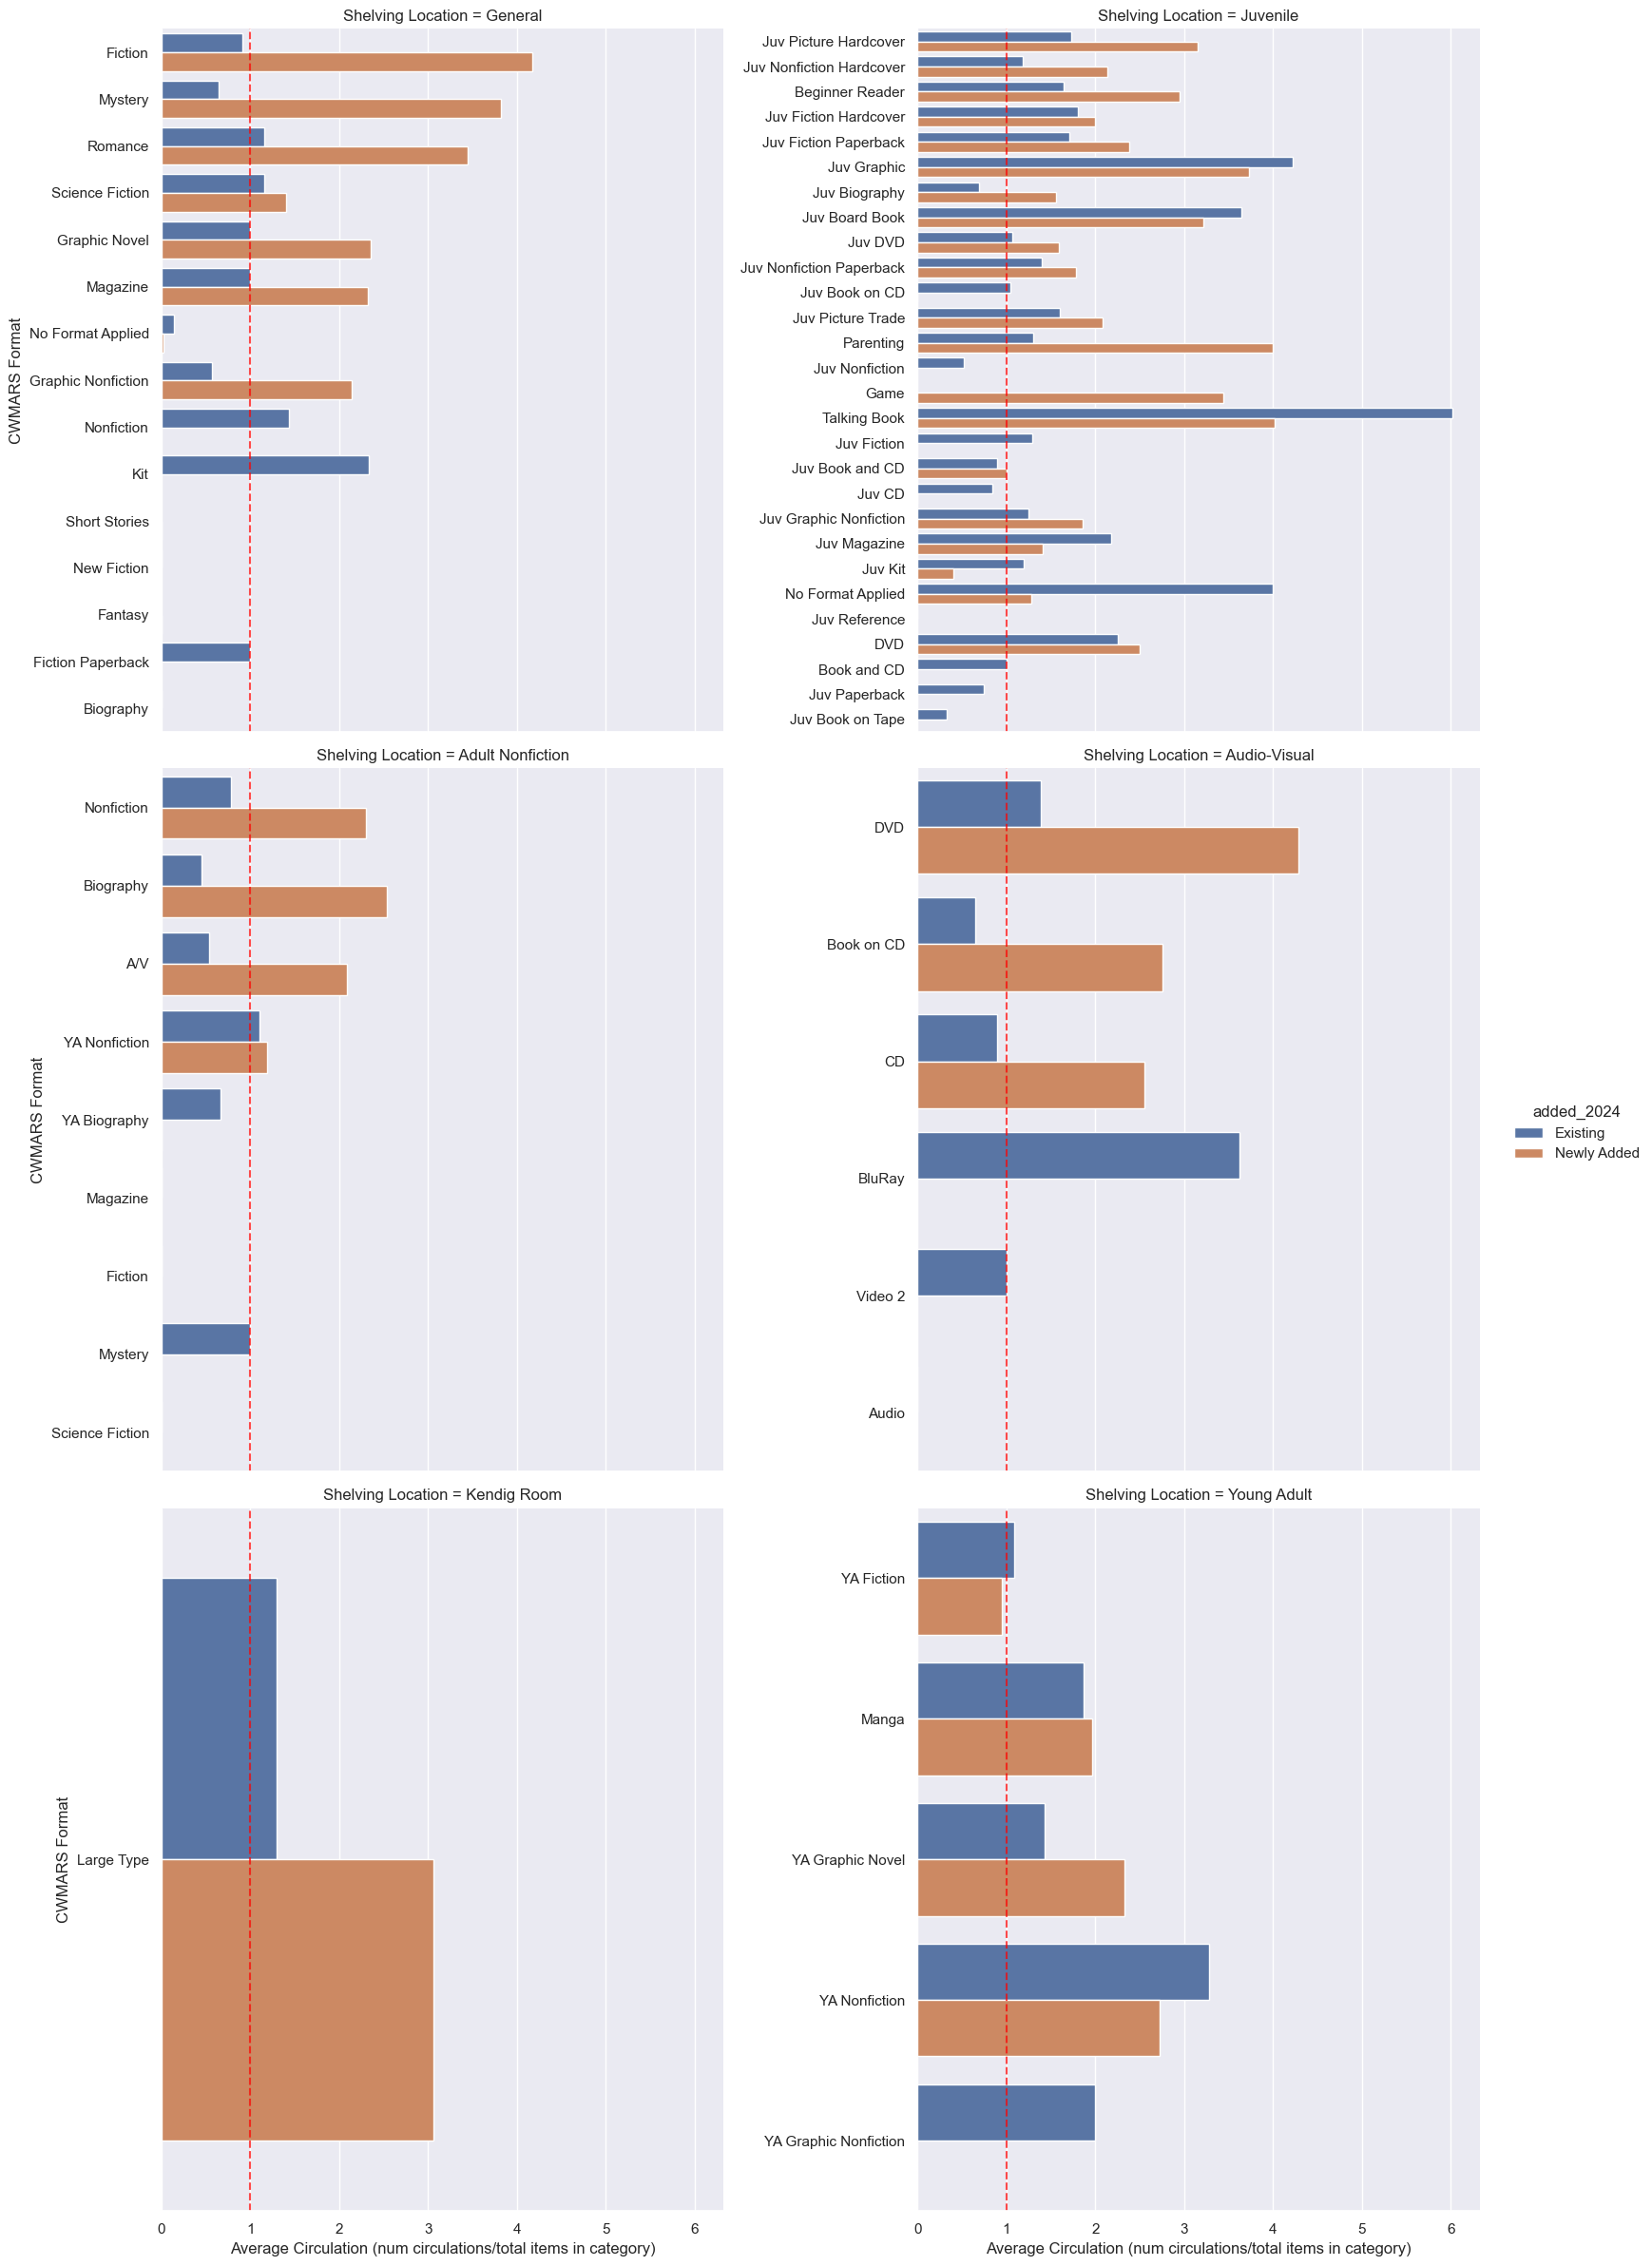

In [107]:
data = circ_ratios_cwmars.copy()
data = data[data['CWMARS Format']!="Equipment"]

g = sns.catplot(
    data=data, y="CWMARS Format",x=("PY Circs",'ratio'), col='Shelving Location',hue='added_2024',
    kind="bar", col_wrap=2,height=8,sharey=False,
)

#Dropping equipment from general since it's quite a high ratio 

g.set_xlabels("Average Circulation (num circulations/total items in category)")
g.refline(x=1.0, color='red', alpha=0.7)

As before, a ratio > 1.0 roughly indicates that for the previous year, items circulated more often than there are items. Or in other words, the average circulation for each item is > 1. With this kind of breakdown, you can start to see for each section of the library the kinds of items that circulate often and the kinds that do not (relative to their volume). I omitted "Equipment" from this plot simply because it skewed the plot. The "Equipment" type ratio is > 10, with 12 records for equipment and over 120 circs. 

This is helpful perhaps to see what kind of media circulates, but not very helpful with genre. Or it kind of is because some genres seem to be mixed in. General has "Mystery" and "Romance" but also has "Paperback", "Magazine", and just "Fiction" so it's not clear how that actually was categorized. 

## Zero Circs CWMARS Format

In [108]:
#get all of the items that did circ (nonzero number of circs)
nonzero_circs_cwmars = df_circulating[df_circulating['PY Circs']!=0][["PY Circs", "Shelving Location", 'CWMARS Format', 'added_2024']].groupby(["Shelving Location", "CWMARS Format",'added_2024']).count()
circ_counts_cwmars = df_circulating[["PY Circs", "Shelving Location", "CWMARS Format",'added_2024']].groupby(["Shelving Location", "CWMARS Format",'added_2024']).count()

In [109]:
nonzero_circs_cwmars

PY Circs
Shelving Location CWMARS Format         added_2024           
Adult Nonfiction  A/V                   Existing           53
                                        Newly Added         5
                  Biography             Existing          119
                                        Newly Added        54
                  Mystery               Existing            1
...                                                       ...
Young Adult       YA Graphic Nonfiction Existing            1
                  YA Graphic Novel      Existing           73
                                        Newly Added        46
                  YA Nonfiction         Existing           17
                                        Newly Added         8

[95 rows x 1 columns]

In [110]:
nonzero_circs_cwmars/circ_counts_cwmars

PY Circs
Shelving Location CWMARS Format         added_2024           
Adult Nonfiction  A/V                   Existing     0.284946
                                        Newly Added  0.416667
                  Biography             Existing     0.198333
                                        Newly Added  0.805970
                  Fiction               Existing          NaN
...                                                       ...
Young Adult       YA Graphic Nonfiction Existing     1.000000
                  YA Graphic Novel      Existing     0.532847
                                        Newly Added  0.696970
                  YA Nonfiction         Existing     0.680000
                                        Newly Added  0.727273

[107 rows x 1 columns]

In [111]:
data_zeros = nonzero_circs_cwmars/circ_counts_cwmars
data_zeros.reset_index(inplace=True)

In [112]:
data_zeros

,Shelving Location,CWMARS Format,added_2024,PY Circs
0,Adult Nonfiction,A/V,Existing,0.284946
1,Adult Nonfiction,A/V,Newly Added,0.416667
2,Adult Nonfiction,Biography,Existing,0.198333
3,Adult Nonfiction,Biography,Newly Added,0.805970
4,Adult Nonfiction,Fiction,Existing,NaN
...,...,...,...,...
102,Young Adult,YA Graphic Nonfiction,Existing,1.000000
103,Young Adult,YA Graphic Novel,Existing,0.532847
104,Young Adult,YA Graphic Novel,Newly Added,0.696970
105,Young Adult,YA Nonfiction,Existing,0.680000


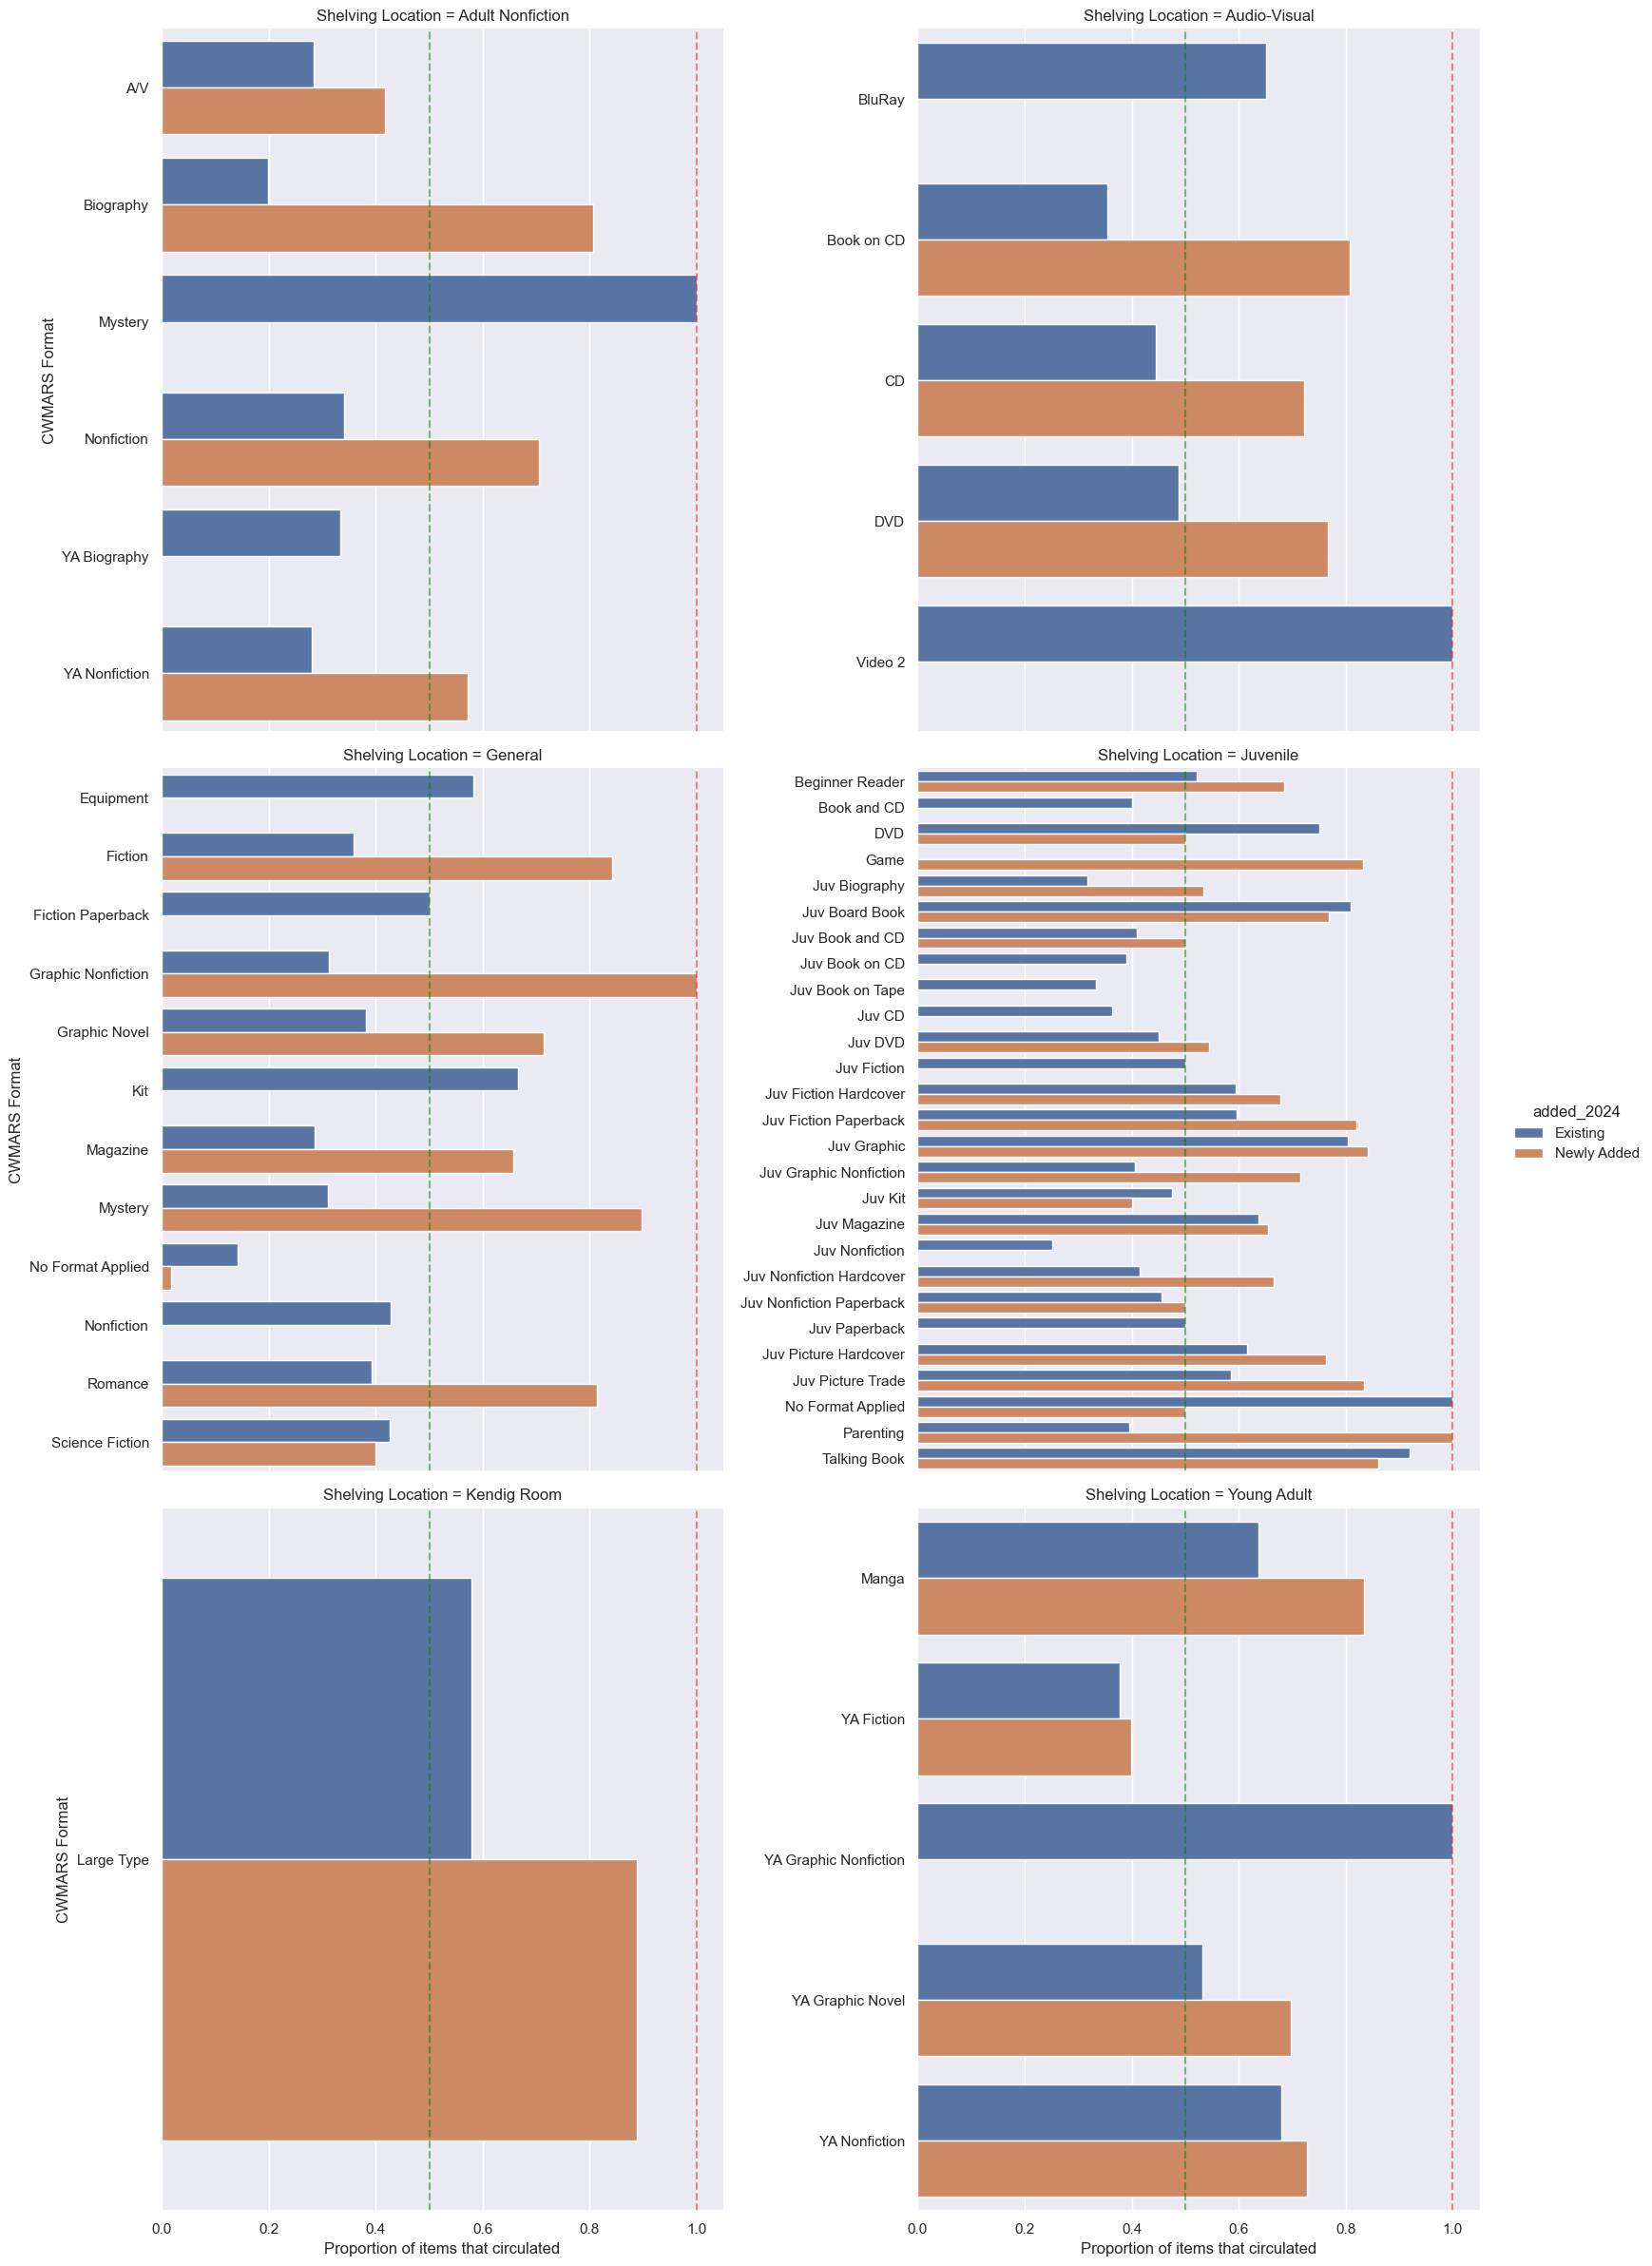

In [113]:
g = sns.catplot(
    data=data_zeros, y="CWMARS Format",x="PY Circs", col='Shelving Location',hue='added_2024',
    kind="bar", col_wrap=2,height=8,sharey=False,
)

#Dropping equipment from general since it's quite a high ratio 

g.set_xlabels("Proportion of items that circulated")
g.refline(x=1.0, color="red", alpha=0.5)
g.refline(x=0.5, color="green", alpha=0.5)

In [114]:
tmp = nonzero_circs_cwmars/circ_counts_cwmars
circ_counts_cwmars[tmp['PY Circs']>.8]

PY Circs
Shelving Location CWMARS Format         added_2024           
Adult Nonfiction  Biography             Newly Added        67
                  Mystery               Existing            1
Audio-Visual      Book on CD            Newly Added        57
                  Video 2               Existing            1
General           Fiction               Newly Added       615
                  Graphic Nonfiction    Newly Added         7
                  Mystery               Newly Added       164
                  Romance               Newly Added       344
Juvenile          Game                  Newly Added       107
                  Juv Board Book        Existing          562
                  Juv Fiction Paperback Newly Added       100
                  Juv Graphic           Existing         1014
                                        Newly Added       257
                  Juv Picture Trade     Newly Added        12
                  No Format Applied     Existing            1
                  Parenting             Newly Added         1
                  Talking Book          Existing           87
                                        Newly Added        86
Kendig Room       Large Type            Newly Added       275
Young Adult       Manga                 Newly Added        66
                  YA Graphic Nonfiction Existing            1

In this view, a ratio of 1.0 means every item was circulated at least once during the year. "Red" indicates 1.0 or every item circulated, while Green is 0.5 or half of the collection.

 Looking at some of the "high ratio" items, the ones that = 1.0 only have one item in each subcategory and it circulated. The interesting ones are those with more - Juv Graphic, Board Books, Talking Books, and Games all circulated a large portion of the collection (>0.80). 



In [115]:
df[(df['Shelving Location']=="Young Adult") & (df['CWMARS Format']=="YA Graphic Nonfiction")]

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID,create_date,added_2024
48817,Westminster Forbush Memorial Library,Young Adult,NaN,GN 955.05 SATR,NaN,NaN,Available,Book,37365002332587,2463946,https://bark.cwmars.org/opac/extras/ac/jacket/...,The complete Persepolis,"Satrapi, Marjane 1969-","New York : Pantheon, [2007]",2007,"{9780375714832,0375714839}",NaN,24.90,2009-04-16 00:00:00-04:00,2009-04-16 00:00:00-04:00,2025-02-12 12:35:37.677282-05:00,2025-02-12 12:35:37.677282-05:00,2024-08-14,24,0,2,64,-,-,Book,Young Adult,Books,YA Graphic Nonfiction,-,True,True,NaN,NaN,ocolc 153773813,GN_955_050000000000000_SATR,False,1334919,2009-04-16,Existing
48868,Westminster Forbush Memorial Library,Young Adult,NaN,YA 793.73 DUNG,NaN,NaN,Library Use Only,Noncirculating,37365003168535,5118411,https://bark.cwmars.org/opac/extras/ac/jacket/...,D & D creature & NPC cards,NaN,"Middlesex, UK : Hasbro, Inc., [2019]",2019,"{0786966947,9780786966943}",NaN,19.39,2024-11-08 13:41:03-05:00,2024-11-13 07:41:16.053055-05:00,2024-11-13 07:41:16.053055-05:00,2024-11-13 07:41:16.053055-05:00,NaT,0,0,0,0,-,-,"Equipment, games, toys",Young Adult,Books,YA Graphic Nonfiction,-,True,False,NaN,NaN,ocolc 1288620047,YA_793_730000000000000_DUNG,False,22460327,2024-11-08,Newly Added


In [116]:

datestuff = df.groupby("create_date").count()
datestuff.reset_index(inplace=True)

Text(0, 0.5, 'count')

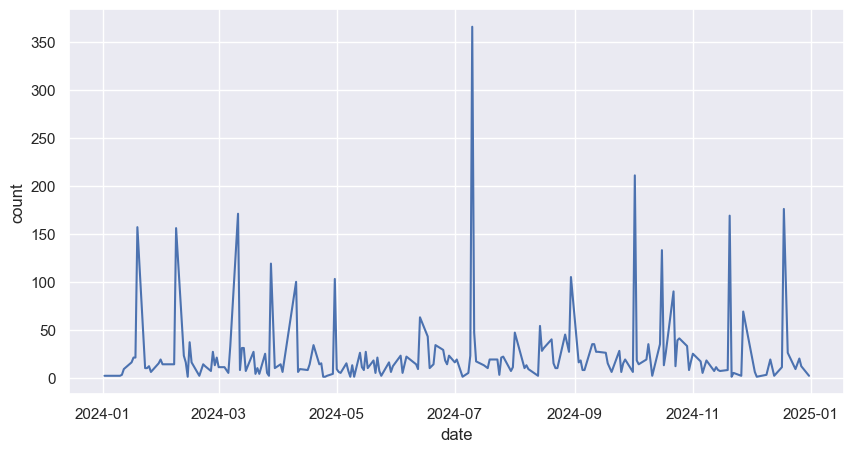

In [117]:
fig, ax = plt.subplots(figsize = (10,5))
compare_date = datetime.datetime.strptime("2024-01-01 0:0:00","%Y-%m-%d %H:%M:%S")
g = sns.lineplot(data=datestuff[datestuff['create_date']>compare_date.date()], x='create_date', y='Owning Library')
g.set_xlabel("date")
g.set_ylabel("count")

# Genre-fy

I have on good authority that the books we're interested in breaking into genres are those that have a call number starting with "FIC". Let's take a look

In [118]:
fic = df[df['Call Number'].str.startswith("FIC") & df["Call Number"].notna()]

In [119]:
# CWMARS format
fic['CWMARS Format'].unique()

array(['Fiction', 'Romance', 'Fiction Paperback', 'New Fiction',
       'Short Stories', 'Magazine', 'Mystery', 'Nonfiction',
       'Juv Fiction Hardcover'], dtype=object)

Interesting -- most books in fiction agree with CWMARS (they are also "Fiction") except Westminster doesn't have a "Romance" section. Or at least CWMARS breaks these out special. Looks like we can add these genres and at least check them against Romance. Interesting that there are a handful of Nonfiction and others. Although fairly small overall.

In [120]:

fic.groupby('CWMARS Format').count()['Owning Library']

CWMARS Format
Fiction                  6107
Fiction Paperback           2
Juv Fiction Hardcover       1
Magazine                    1
Mystery                     4
New Fiction                 2
Nonfiction                  4
Romance                  1368
Short Stories               3
Name: Owning Library, dtype: int64

In [121]:
fic.shape

(7492, 44)

In [122]:
fic.sort_values(by='Create Date/Time', ascending=False).head()

,Owning Library,Shelving Location,CN Prefix,Call Number,CN Suffix,Part,Item Status,Circ Modifier,Barcode,TCN,Cover,Title,Author,Publisher,Published Year,ISBN,ISSN,Price,Create Date/Time,Active Date/Time,Item Status Change Date/Time,Last Edit Date/Time,Last Circ in EG,Total Circs,CY Circs,PY Circs,Other Copies,Item Alerts,Item Notes,Catalog Icon,ARIS Age,ARIS Format,CWMARS Format,Library StatCat,Circulate Field,Holdable Field,Latest Inventory Date/Time,Inventory Workstation,OCLC #,Call Number Sortkey,Deleted?,Item ID,create_date,added_2024
17545,Westminster Forbush Memorial Library,General,NaN,FIC MAGUIR/ WICKED YEARS #1,NaN,NaN,Available,Book,37365003178914,5104880,https://bark.cwmars.org/opac/extras/ac/jacket/...,Wicked : the life and times of the Wicked Witc...,"Maguire, Gregory","New York, NY : William Morrow, 2024.",2024,"{0063398346,9780063398344}",NaN,12.30,2024-12-31 08:23:36-05:00,2024-12-31 10:39:35-05:00,2025-04-02 18:03:10-04:00,2025-04-11 11:05:18.152522-04:00,2025-03-21,1,1,0,2,-,-,Book,Adult,Books,Fiction,-,True,True,NaN,NaN,ocolc 1450563580,FIC_MAGUIR_WICKED_YEARS_1,False,22534587,2024-12-31,Newly Added
15549,Westminster Forbush Memorial Library,General,NaN,FIC GILMOR/ DREAM HARBOR #3,NaN,NaN,Checked out,New Fiction,37365003178674,5106101,https://bark.cwmars.org/opac/extras/ac/jacket/...,The Christmas tree farm,"Gilmore, Laurie","London, UK : One More Chapter, a division of H...",2024,"{0008610746,9780008610746}",NaN,11.58,2024-12-24 12:51:01-05:00,2024-12-26 15:33:32-05:00,2025-04-10 17:54:39.906731-04:00,2025-04-10 17:54:39.906731-04:00,2025-04-10,7,6,1,44,-,-,Book,Adult,Books,Romance,-,True,True,NaN,NaN,ocolc 1461742328,FIC_GILMOR_DREAM_HARBOR_3,False,22529101,2024-12-24,Newly Added
15548,Westminster Forbush Memorial Library,General,NaN,FIC GILMOR/ DREAM HARBOR #2,NaN,NaN,Checked out,New Fiction,37365003178666,5099794,https://bark.cwmars.org/opac/extras/ac/jacket/...,The cinnamon bun book store,"Gilmore, Laurie","London : One More Chapter, a division of Harpe...",2024,"{0008641587,9780008641580}",NaN,11.58,2024-12-24 12:50:24-05:00,2024-12-26 15:31:13-05:00,2025-04-09 14:18:59.058817-04:00,2025-04-09 14:18:59.058817-04:00,2025-04-09,4,4,0,43,-,-,Book,Adult,Books,Romance,-,True,True,NaN,NaN,ocolc 1450985969,FIC_GILMOR_DREAM_HARBOR_2,False,22529100,2024-12-24,Newly Added
17485,Westminster Forbush Memorial Library,General,NaN,FIC MACKEN,NaN,NaN,Available,New Fiction,37365003181660,5122345,https://bark.cwmars.org/opac/extras/ac/jacket/...,Work in progress : a novel,"Mackenzie, Kat","New York, NY : Avon, an imprint of HarperColli...",2025,"{9780063379046,0063379031,9780063379039}",NaN,11.58,2024-12-18 11:38:47-05:00,2025-01-16 09:11:34-05:00,2025-04-12 11:51:33.501722-04:00,2025-04-12 11:51:33.501722-04:00,2025-04-10,5,5,0,26,-,-,Book,Adult,Books,Romance,-,True,True,NaN,NaN,ocolc 1443482614,FIC_MACKEN,False,22522275,2024-12-18,Newly Added
16591,Westminster Forbush Memorial Library,General,NaN,FIC JESSEN,NaN,NaN,Available,New Fiction,37365003188194,5117299,https://bark.cwmars.org/opac/extras/ac/jacket/...,Yin yang love song,"Jessen, Lauren Kung","New York : Forever, 2025.",2025,"{1538741636,9781538741634}",NaN,10.97,2024-12-18 11:38:47-05:00,2025-03-07 15:58:36.498866-05:00,2025-03-07 15:58:36.498866-05:00,2025-03-07 15:58:36.498866-05:00,NaT,0,0,0,42,-,-,Book,Adult,Books,Romance,-,True,True,NaN,NaN,ocolc 1446299404,FIC_JESSEN,False,22522279,2024-12-18,Newly Added


In [123]:
fic[["Item ID", 'Title', "Author"]].sample(5)

,Item ID,Title,Author
17021,3034355,Forever odd,"Koontz, Dean R. (Dean Ray) 1945-"
14050,21402562,Birnam Wood,"Catton, Eleanor 1985-"
13373,22346046,All I want is you : a novel,"Ballard, Falon"
20106,19211469,Surfside sisters : a novel,"Thayer, Nancy 1943-"
17619,21054458,Should I tell you?,"Mansell, Jill"


Now is the point in the show where I'm going to use Gemini to classify all of the FIC books into one of the following genres:

ALLOWED_GENRES = [
    "Romance", "Sci Fi", "Fantasy", "Historical Fiction", "Horror",
    "Biographies/Memoirs", "Mystery", "Western", "Christian Fiction", "Thriller"
]

If Gemini doesn't think these apply, it will assign "Literary Fiction" or "Other"

We can then use these new genres to further understand the circulation stats for 2024. (I'm only including books that were added before 2025 in this script since those will be the ones in the analysis)

It isn't _too_ important if Gemini doesn't get the definitive "correct" genre here. It just needs to separate out the major categories. 

In [126]:
%load_ext autoreload
%autoreload 2
import src.genrefy_books as gb
import importlib

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# classified_df = gb.classify_dataframe(fic[["Item ID", 'Title', "Author"]])

In [ ]:
# classified_df.to_csv("classified_books.csv", index=False)

In [6]:
classified_df = pd.read_csv("classified_books.csv")

In [7]:
classified_df.head()

,Item ID,Title,Author,Genre
0,21369127,Ghost season : a novel,"Abbas, Fatin",Literary Fiction
1,20389986,An ambush of widows,"Abbott, Jeff",Thriller
2,18578627,Give me your hand,"Abbott, Megan",Thriller
3,21543529,Beware the woman : a novel,"Abbott, Megan 1971-",Thriller
4,20424874,The turnout : a novel,"Abbott, Megan 1971-",Thriller


In [8]:
classified_df.shape

(7492, 4)

In [9]:
classified_df.describe()

,Item ID
count,7.492000e+03
mean,1.768000e+07
std,6.353633e+06
min,7.078000e+03
25%,1.788804e+07
50%,2.025035e+07
75%,2.136909e+07
max,2.253459e+07


<Axes: xlabel='count', ylabel='Genre'>

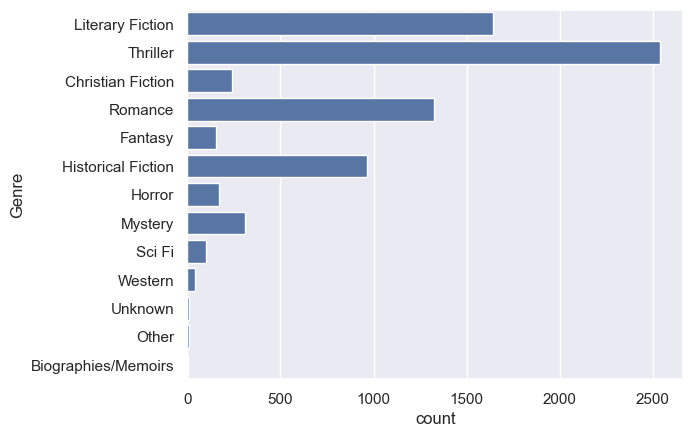

In [10]:
sns.countplot(data=classified_df, y="Genre")

A handful of books didn't get classified, but given it's only 15 or so, I'm not going to worry too much about it. It shouldn't change the statistics.


In [11]:
classified_df[classified_df['Genre']=="Unknown"]

,Item ID,Title,Author,Genre
627,20270800,Collectibles,NaN,Unknown
1471,4117042,A new collection,"Crichton, Michael 1942-2008",Unknown
1501,22140475,Out of office,"Cunningham, A. H.",Unknown
2803,3965644,Delta Blues,NaN,Unknown
3187,18166653,The bride wore blue,NaN,Unknown
4518,21427127,Justice of Brenda the wolverine,"Markman, Alex",Unknown
6223,22400149,The undercurrent,"Sawyer, Sarah (Teacher)",Unknown


In [12]:
classified_df[classified_df['Genre']=="Other"]

,Item ID,Title,Author,Genre
1790,3050435,Old Calabria,"Douglas, Norman 1868-1952",Other
2321,16182888,Outlandish companion : the first companion to ...,"Gabaldon, Diana.",Other
2323,19633826,The outlandish companion. the second companion...,"Gabaldon, Diana.",Other
4597,21059694,A place in the world : finding the meaning of ...,"Mayes, Frances",Other
5120,19997390,Nothing much happens : cozy and calming storie...,"Nicolai, Kathryn",Other
6234,20064848,An inventory of losses,"Schalansky, Judith 1980-",Other
6787,18997269,A bloody business : the rise of organized crim...,"Struzan, Dylan",Other


In [13]:
classified_df[classified_df['Genre']=="Biographies/Memoirs"]

,Item ID,Title,Author,Genre
6246,22186089,Swimming in Paris : a life in three stories,"Schneck, Colombe 1966-",Biographies/Memoirs


# Circulating FIC

Combine the data

In [124]:
df_circulating[df_circulating["Call Number"].str.startswith("FIC") & df_circulating["Call Number"].notna()].shape

(7492, 44)

In [125]:
classified_df['Item ID'] = pd.to_numeric(classified_df['Item ID'])

In [140]:
classified_combined = pd.merge(df_circulating[df_circulating["Call Number"].str.startswith("FIC") & df_circulating["Call Number"].notna()], classified_df[['Item ID', "Genre"]], how='left', on='Item ID')

In [141]:
classified_combined.columns

Index(['Owning Library', 'Shelving Location', 'CN Prefix', 'Call Number', 'CN Suffix', 'Part', 'Item Status', 'Circ Modifier', 'Barcode', 'TCN', 'Cover', 'Title', 'Author', 'Publisher', 'Published Year', 'ISBN', 'ISSN', 'Price', 'Create Date/Time', 'Active Date/Time', 'Item Status Change Date/Time', 'Last Edit Date/Time', 'Last Circ in EG', 'Total Circs', 'CY Circs', 'PY Circs', 'Other Copies', 'Item Alerts', 'Item Notes', 'Catalog Icon', 'ARIS Age', 'ARIS Format', 'CWMARS Format', 'Library StatCat', 'Circulate Field', 'Holdable Field', 'Latest Inventory Date/Time', 'Inventory Workstation', 'OCLC #', 'Call Number Sortkey', 'Deleted?', 'Item ID', 'create_date', 'added_2024', 'Genre'], dtype='object')

In [142]:
classified_combined['Genre'].unique()

array(['Literary Fiction', 'Thriller', 'Christian Fiction', 'Romance',
       'Fantasy', 'Historical Fiction', 'Horror', 'Mystery', 'Sci Fi',
       'Western', 'Unknown', 'Other', 'Biographies/Memoirs'], dtype=object)

In [143]:
#don't include the "unknown", "Other", or "Biographies" since there aren't enough to matter
genres_to_include = ['Literary Fiction', 'Thriller', 'Christian Fiction', 'Romance',
       'Fantasy', 'Historical Fiction', 'Horror', 'Mystery', 'Sci Fi',
       'Western']
circ_ratios_ficgenre = classified_combined[classified_combined['Genre'].isin(genres_to_include)][["PY Circs", "Genre", 'added_2024']].groupby(["Genre",'added_2024']).agg({'sum', 'count'}).sort_values(by=("PY Circs", "count"), ascending=False)
circ_ratios_ficgenre.sort_index()

PY Circs      
                                  count   sum
Genre              added_2024                
Christian Fiction  Existing         206   154
                   Newly Added       33   139
Fantasy            Existing         132   138
                   Newly Added       20    49
Historical Fiction Existing         863  1001
                   Newly Added      100   506
Horror             Existing         154   139
                   Newly Added       15    49
Literary Fiction   Existing        1395  1072
                   Newly Added      249   890
Mystery            Existing         275   250
                   Newly Added       36   127
Romance            Existing        1047  1216
                   Newly Added      275   919
Sci Fi             Existing          96    58
                   Newly Added        5    15
Thriller           Existing        2316  2138
                   Newly Added      221  1038
Western            Existing          36    37
                   Newly Added        3     6

In [144]:
circ_ratios_ficgenre[("PY Circs", "ratio")] = circ_ratios_ficgenre[("PY Circs", 'sum')]/circ_ratios_ficgenre[("PY Circs", 'count')]
circ_ratios_ficgenre.reset_index(inplace=True)
circ_ratios_ficgenre.sort_values(by=['Genre'])

Genre   added_2024 PY Circs                
                                       count   sum     ratio
8    Christian Fiction     Existing      206   154  0.747573
15   Christian Fiction  Newly Added       33   139  4.212121
10             Fantasy     Existing      132   138  1.045455
16             Fantasy  Newly Added       20    49  2.450000
3   Historical Fiction     Existing      863  1001  1.159907
11  Historical Fiction  Newly Added      100   506  5.060000
9               Horror     Existing      154   139  0.902597
17              Horror  Newly Added       15    49  3.266667
1     Literary Fiction     Existing     1395  1072  0.768459
6     Literary Fiction  Newly Added      249   890  3.574297
4              Mystery     Existing      275   250  0.909091
13             Mystery  Newly Added       36   127  3.527778
2              Romance     Existing     1047  1216  1.161414
5              Romance  Newly Added      275   919  3.341818
18              Sci Fi  Newly Added        5    15  3.000000
12              Sci Fi     Existing       96    58  0.604167
0             Thriller     Existing     2316  2138  0.923143
7             Thriller  Newly Added      221  1038  4.696833
14             Western     Existing       36    37  1.027778
19             Western  Newly Added        3     6  2.000000

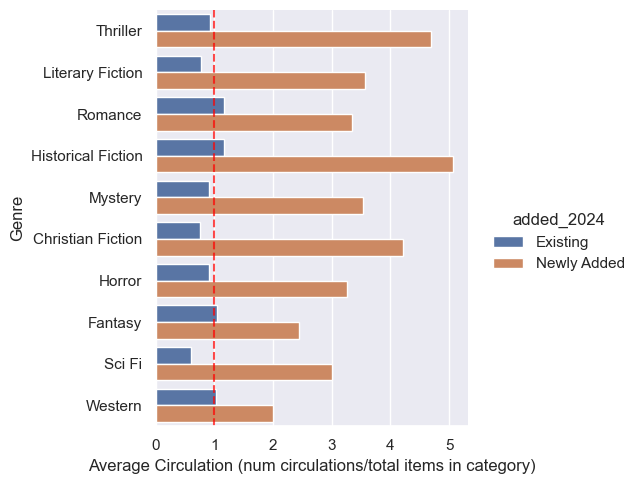

In [145]:
data = circ_ratios_ficgenre.copy()

g = sns.catplot(
    data=data, y="Genre",x=("PY Circs",'ratio'),hue='added_2024',
    kind="bar", hue_order = ['Existing', "Newly Added"]
)

g.set_xlabels("Average Circulation (num circulations/total items in category)")
g.refline(x=1.0, color='red', alpha=0.7)

## Non-zerio Circs Genre

In [146]:
#get all of the items that did circ (nonzero number of circs)
nonzero_circs_ficgenre = classified_combined[classified_combined['Genre'].isin(genres_to_include) & (classified_combined['PY Circs']!=0)][["PY Circs", "Genre", 'added_2024']].groupby(["Genre",'added_2024']).count()
circ_counts_ficgenre = classified_combined[classified_combined['Genre'].isin(genres_to_include)][["PY Circs", "Genre",'added_2024']].groupby(["Genre",'added_2024']).count()

In [147]:
nonzero_circs_ficgenre

PY Circs
Genre              added_2024           
Christian Fiction  Existing           67
                   Newly Added        31
Fantasy            Existing           46
                   Newly Added        16
Historical Fiction Existing          336
                   Newly Added        92
Horror             Existing           61
                   Newly Added        11
Literary Fiction   Existing          426
                   Newly Added       198
Mystery            Existing           82
                   Newly Added        26
Romance            Existing          413
                   Newly Added       221
Sci Fi             Existing           27
                   Newly Added         5
Thriller           Existing          905
                   Newly Added       192
Western            Existing           11
                   Newly Added         2

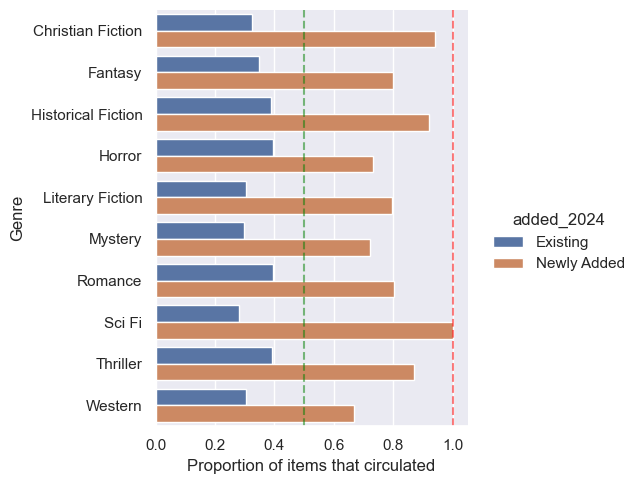

In [148]:
data_zeros = nonzero_circs_ficgenre/circ_counts_ficgenre
data_zeros.reset_index(inplace=True)
g = sns.catplot(
    data=data_zeros, y="Genre",x="PY Circs",hue='added_2024',
    kind="bar",hue_order = ['Existing', "Newly Added"]
)

g.set_xlabels("Proportion of items that circulated")
g.refline(x=1.0, color="red", alpha=0.5)
g.refline(x=0.5, color="green", alpha=0.5)

In [149]:
tmp = nonzero_circs_ficgenre/circ_counts_ficgenre
circ_counts_ficgenre[tmp['PY Circs']>.8]

,,PY Circs
Genre,added_2024,
Christian Fiction,Newly Added,33
Historical Fiction,Newly Added,100
Romance,Newly Added,275
Sci Fi,Newly Added,5
Thriller,Newly Added,221


## Library Fiction Makeup vs Genre

In [150]:
total_py_circs_fic = classified_combined[classified_combined['Genre'].isin(genres_to_include)][["PY Circs", "Genre"]].groupby("Genre").agg({'sum', 'count'}).sort_values(by=("PY Circs", "count"), ascending=False)
total_py_circs_fic[("PY Circs", 'Circulation')] = total_py_circs_fic[("PY Circs", 'sum')]/total_py_circs_fic[("PY Circs", 'sum')].sum()
total_py_circs_fic[("PY Circs", 'Library')] = total_py_circs_fic[("PY Circs", 'count')]/total_py_circs_fic[("PY Circs", 'count')].sum()

total_py_circs_fic.reset_index(inplace=True)


In [151]:
total_py_circs_fic

Genre PY Circs                            
                         count   sum Circulation   Library
0            Thriller     2537  3176    0.319485  0.339307
1    Literary Fiction     1644  1962    0.197364  0.219874
2             Romance     1322  2135    0.214767  0.176809
3  Historical Fiction      963  1507    0.151594  0.128795
4             Mystery      311   377    0.037924  0.041594
5   Christian Fiction      239   293    0.029474  0.031965
6              Horror      169   188    0.018912  0.022603
7             Fantasy      152   187    0.018811  0.020329
8              Sci Fi      101    73    0.007343  0.013508
9             Western       39    43    0.004326  0.005216

Text(0.5, 0, 'Proportion of items\nCirculation = proportion of fiction circulations\nLibrary = proportion of fiction collection')

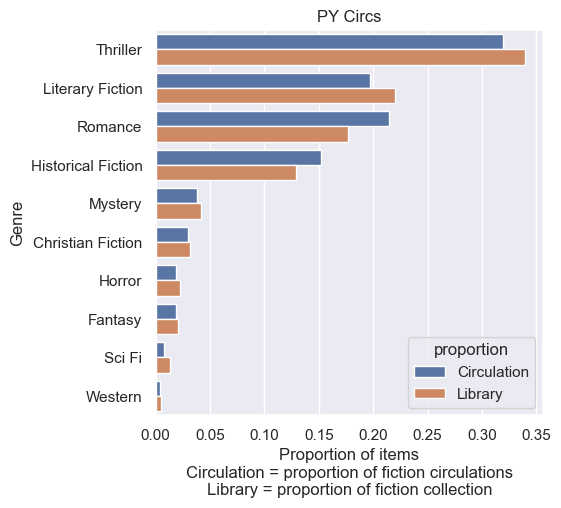

In [152]:
prop_data = pd.melt(total_py_circs_fic, id_vars=[('Genre',"")], value_vars=[("PY Circs", 'Circulation'), ("PY Circs",'Library')])
prop_data.columns = ["Genre", 'PY Circs', 'proportion', 'value']

fig,ax = plt.subplots( figsize = (5,5))

g1 = sns.barplot(data = prop_data, x= "value", y="Genre", hue='proportion', ax=ax)
g1.set_title("PY Circs")
g1.set_xlabel("Proportion of items\nCirculation = proportion of fiction circulations\nLibrary = proportion of fiction collection")

In [155]:
classified_combined[['Item ID', "Barcode", "Title", "Author", "Genre"]].to_csv("classified_books.csv", index=False)